# Imports 

In [5]:
from collections import Counter

In [6]:
import pandas as pd

In [7]:
import numpy as np


In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns


In [10]:
from transformers import AutoTokenizer #, AutoModelForSequenceClassification

In [11]:
# Para ter repetibilidade nos resultados
random_state = 1

# Tratar valores infinitos (+ e -) como np.NaN
pd.options.mode.use_inf_as_na = True

# IMPORTANTE para tornar figuras interativas
# %matplotlib notebook

# Tamanho padrão das figuras
figsize=(10,6)

pd.set_option('display.max_row', 1000)

pd.set_option('display.max_columns', 50)

pd.set_option('display.column_space', 40)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 200)


In [12]:
PATH_QUERY = '../data/juris_tcu_index/query.csv'
PATH_QREL =  '../data/juris_tcu_index/qrel.csv'
PATH_DOC =  '../data/juris_tcu_index/doc.csv'

# Carga e comparação de tokenizadores

In [13]:
texto = 'Nas transferências voluntárias de recursos da União destinados à realização de investimentos em estrutura física de sistema gerido por concessionária de serviços de saneamento, qualquer que seja a composição do seu capital, é obrigatório que essa entidade e o ente federativo beneficiado figurem como intervenientes na avença e assumam a obrigação: (i) de que os investimentos realizados com recursos federais não onerosos: não componham a base tarifária da concessionária, a título de depreciação, amortização e exaustão; não gerem direito a indenização ao término da concessão; sejam registrados pelo ente federativo titular do serviço público e pela concessionária, em item patrimonial específico; sejam excluídos do plano de investimentos da concessionária, com a correspondente compensação mediante substituição por investimentos da mesma monta ou dedução da base tarifária; (ii) de promover o reequilíbrio econômico-financeiro da concessão sempre que os investimentos realizados com recursos federais não onerosos propiciem aumento significativo do lucro da concessionária como resultado da ampliação de sua capacidade de atendimento. '

In [14]:
nome_modelo_ranking_pt = 'unicamp-dl/mMiniLM-L6-v2-pt-v2'
nome_caminho_modelo_pt = "/home/borela/fontes/relevar-busca/modelo/" + nome_modelo_ranking_pt
assert os.path.exists(nome_caminho_modelo_pt), f"Path para {nome_caminho_modelo_pt} não existe!"

In [15]:
tokenizador_pt_minilm = AutoTokenizer.from_pretrained(nome_caminho_modelo_pt)

In [16]:
features = tokenizador_pt_minilm.tokenize(
            texto,
            #padding=True,
            #truncation=True,
           )
print(features)

['▁Nas', '▁transferência', 's', '▁volunt', 'árias', '▁de', '▁recursos', '▁da', '▁União', '▁destinado', 's', '▁à', '▁realização', '▁de', '▁investimentos', '▁em', '▁estrutura', '▁física', '▁de', '▁sistema', '▁geri', 'do', '▁por', '▁concession', 'ária', '▁de', '▁serviços', '▁de', '▁sa', 'ne', 'amento', ',', '▁qualquer', '▁que', '▁seja', '▁a', '▁com', 'posição', '▁do', '▁seu', '▁capital', ',', '▁é', '▁obriga', 'tório', '▁que', '▁essa', '▁entidade', '▁e', '▁o', '▁en', 'te', '▁federa', 'tivo', '▁beneficia', 'do', '▁figure', 'm', '▁como', '▁interven', 'ientes', '▁na', '▁av', 'en', 'ça', '▁e', '▁a', 'ssum', 'am', '▁a', '▁obriga', 'ção', ':', '▁(', 'i', ')', '▁de', '▁que', '▁os', '▁investimentos', '▁realizados', '▁com', '▁recursos', '▁federa', 'is', '▁não', '▁on', 'er', 'osos', ':', '▁não', '▁comp', 'on', 'ham', '▁a', '▁base', '▁tarif', 'ária', '▁da', '▁concession', 'ária', ',', '▁a', '▁título', '▁de', '▁de', 'preci', 'ação', ',', '▁amortiz', 'ação', '▁e', '▁ex', 'a', 'ust', 'ão', ';', '▁não', 

In [17]:
def retorna_num_tokens(parm_texto:str, parm_tokenizador:AutoTokenizer):
    return len(parm_tokenizador.tokenize(parm_texto))
retorna_num_tokens(texto, tokenizador_pt_minilm)

238

In [18]:
nome_modelo_monot5_3b = 'unicamp-dl/mt5-3B-mmarco-en-pt'
# "A mono-ptT5 reranker model (850 mb) pretrained in the BrWac corpus, finetuned for 100k steps on Portuguese translated version of MS MARCO passage dataset. The portuguese dataset was translated using Google Translate.")

nome_caminho_modelo_3b = "/home/borela/fontes/relevar-busca/modelo/" + nome_modelo_monot5_3b
assert os.path.exists(nome_caminho_modelo_3b), f"Path para {nome_caminho_modelo_3b} não existe!"

In [19]:
tokenizador_pt_monot5_3b = AutoTokenizer.from_pretrained(nome_caminho_modelo_3b)

/home/borela/miniconda3/envs/relevar-busca/lib/python3.7/site-packages/transformers/convert_slow_tokenizer.py:447: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  "The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option"


In [20]:
features_3b = tokenizador_pt_monot5_3b.tokenize(
            texto,
            #padding=True,
            #truncation=True,
           )
print(features_3b)

['▁Nas', '▁transfer', 'ências', '▁volunt', 'árias', '▁de', '▁', 'recursos', '▁da', '▁Uni', 'ão', '▁destina', 'dos', '▁', 'à', '▁realiza', 'ção', '▁de', '▁', 'investimento', 's', '▁em', '▁', 'estrutura', '▁', 'físic', 'a', '▁de', '▁sistema', '▁geri', 'do', '▁por', '▁', 'concession', 'ária', '▁de', '▁', 's', 'erviços', '▁de', '▁sane', 'amento', ',', '▁qual', 'quer', '▁que', '▁seja', '▁', 'a', '▁', 'com', 'posição', '▁do', '▁seu', '▁capital', ',', '▁', 'é', '▁obriga', 'tório', '▁que', '▁essa', '▁', 'entidad', 'e', '▁', 'e', '▁', 'o', '▁', 'ente', '▁federa', 'tivo', '▁beneficia', 'do', '▁figure', 'm', '▁como', '▁interven', 'ientes', '▁na', '▁av', 'ença', '▁', 'e', '▁assum', 'am', '▁', 'a', '▁obriga', 'ção', ':', '▁(', 'i', ')', '▁de', '▁que', '▁', 'os', '▁', 'investimento', 's', '▁realiza', 'dos', '▁', 'com', '▁', 'recursos', '▁federa', 'is', '▁não', '▁one', 'rosos', ':', '▁não', '▁compo', 'n', 'ham', '▁', 'a', '▁base', '▁tarif', 'ária', '▁da', '▁', 'concession', 'ária', ',', '▁', 'a', '▁'

In [21]:
print(features)

['▁Nas', '▁transferência', 's', '▁volunt', 'árias', '▁de', '▁recursos', '▁da', '▁União', '▁destinado', 's', '▁à', '▁realização', '▁de', '▁investimentos', '▁em', '▁estrutura', '▁física', '▁de', '▁sistema', '▁geri', 'do', '▁por', '▁concession', 'ária', '▁de', '▁serviços', '▁de', '▁sa', 'ne', 'amento', ',', '▁qualquer', '▁que', '▁seja', '▁a', '▁com', 'posição', '▁do', '▁seu', '▁capital', ',', '▁é', '▁obriga', 'tório', '▁que', '▁essa', '▁entidade', '▁e', '▁o', '▁en', 'te', '▁federa', 'tivo', '▁beneficia', 'do', '▁figure', 'm', '▁como', '▁interven', 'ientes', '▁na', '▁av', 'en', 'ça', '▁e', '▁a', 'ssum', 'am', '▁a', '▁obriga', 'ção', ':', '▁(', 'i', ')', '▁de', '▁que', '▁os', '▁investimentos', '▁realizados', '▁com', '▁recursos', '▁federa', 'is', '▁não', '▁on', 'er', 'osos', ':', '▁não', '▁comp', 'on', 'ham', '▁a', '▁base', '▁tarif', 'ária', '▁da', '▁concession', 'ária', ',', '▁a', '▁título', '▁de', '▁de', 'preci', 'ação', ',', '▁amortiz', 'ação', '▁e', '▁ex', 'a', 'ust', 'ão', ';', '▁não', 

In [22]:
print(f"Total de tokens minilm: {len(features)}, monot5_3b: {len(features_3b)}")

Total de tokens minilm: 238, monot5_3b: 311


# Data Exploration - Jurisprudência (query) 

In [23]:
df_enunciado = pd.read_csv(PATH_QUERY)

In [24]:
df_enunciado.shape

(16045, 11)

In [25]:
df_enunciado.head()

,ID,TEXT,REFERENCE_LIST,PARADIGMATIC,AREA_NAME,AREA_ID_DESCRIPTOR,NORMATIVE_PROCESS_TYPE,NORMATIVE_IDENTIFICATION,NORMATIVE_DATE,NORMATIVE_AUTHOR_TYPE,NORMATIVE_AUTHOR_NAME
0,13568,"É ilegal a contagem de tempo ficto de serviço prestado sob a égide da Lei 3.313/1957, proporcion...",Lei Complementar 51/1985 || Lei Ordinária 3313/1957,NaN,Pessoal,1131,APOSENTADORIA,Acórdão 168/2014 - Segunda Câmara,2014-01-28,RELATOR,JOSÉ JORGE
1,11614,"SÚMULA TCU 283: Para fim de habilitação, a Administração Pública não deve exigir dos licitantes ...",NaN,SUMULA,Licitação,932,ADMINISTRATIVO,Acórdão 1613/2013 - Plenário,2013-06-26,RELATOR,JOSÉ JORGE
2,21087,"A contratação de serviços por preços superiores às referências legais (Sinapi e Sicro) deve ser,...",NaN,NaN,Licitação,932,PRESTAÇÃO DE CONTAS,Acórdão 3936/2013 - Segunda Câmara,2013-07-09,RELATOR,ANA ARRAES
3,35016,"Não se aplica, excepcionalmente, multa aos gestores por grave infração à norma legal se a irregu...",NaN,NaN,Responsabilidade,775,REPRESENTAÇÃO,Acórdão 3231/2011 - Plenário,2011-12-07,RELATOR,AROLDO CEDRAZ
4,29370,"Em contratatações de TI, não cabe aceitar propostas de preço com incidência de encargos majorado...",NaN,NaN,Licitação,932,REPRESENTAÇÃO,Acórdão 3231/2011 - Plenário,2011-12-07,RELATOR,AROLDO CEDRAZ


## Total por norma referenciada

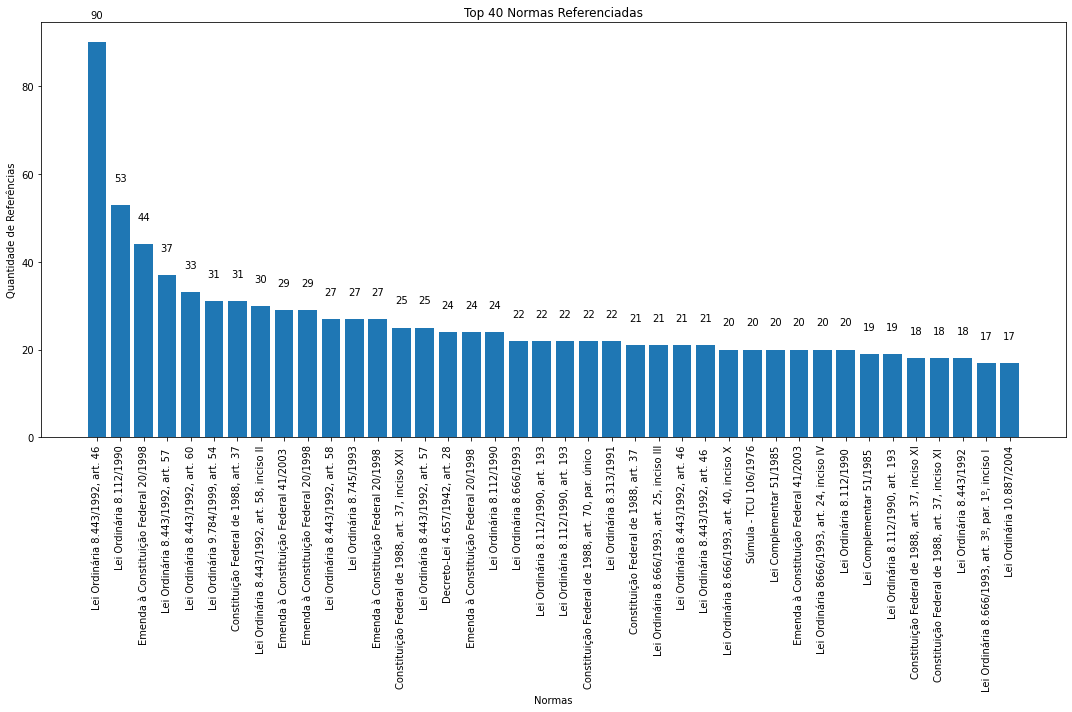

In [26]:
normas_referenciadas = df_enunciado['REFERENCE_LIST'].str.extractall(r'([^||]+)')[0]

# Calcular o total de ocorrências de cada norma referenciada
contagem_normas = Counter(normas_referenciadas)

# Obter as top 40 normas referenciadas mais frequentes
top_40_normas = contagem_normas.most_common(40)

# Extrair os nomes e as quantidades das top 40 normas
normas = [norma[0] for norma in top_40_normas]
quantidades = [norma[1] for norma in top_40_normas]

# Plotar o gráfico de barras
plt.figure(figsize=(15, 10))
plt.bar(normas, quantidades)
plt.title('Top 40 Normas Referenciadas')
plt.xlabel('Normas')
plt.ylabel('Quantidade de Referências')
plt.xticks(rotation=90)

# Adicionar rótulos com a quantidade de referências em cada barra
for i, v in enumerate(quantidades):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Total por atributos

In [27]:
list_property = ['PARADIGMATIC', 'AREA_NAME', 'NORMATIVE_PROCESS_TYPE',  'NORMATIVE_AUTHOR_TYPE',  'NORMATIVE_AUTHOR_NAME']

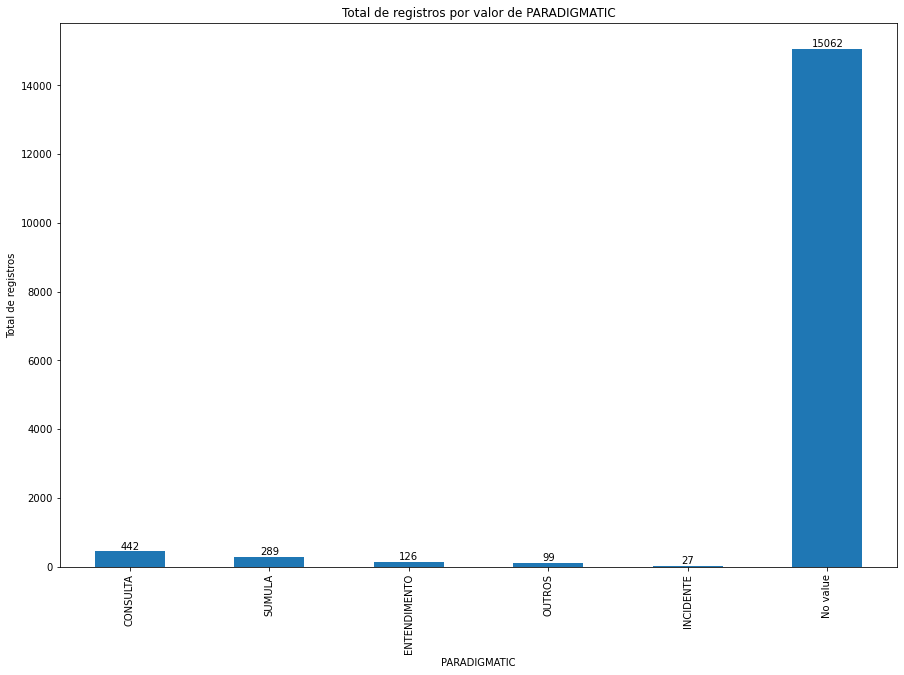

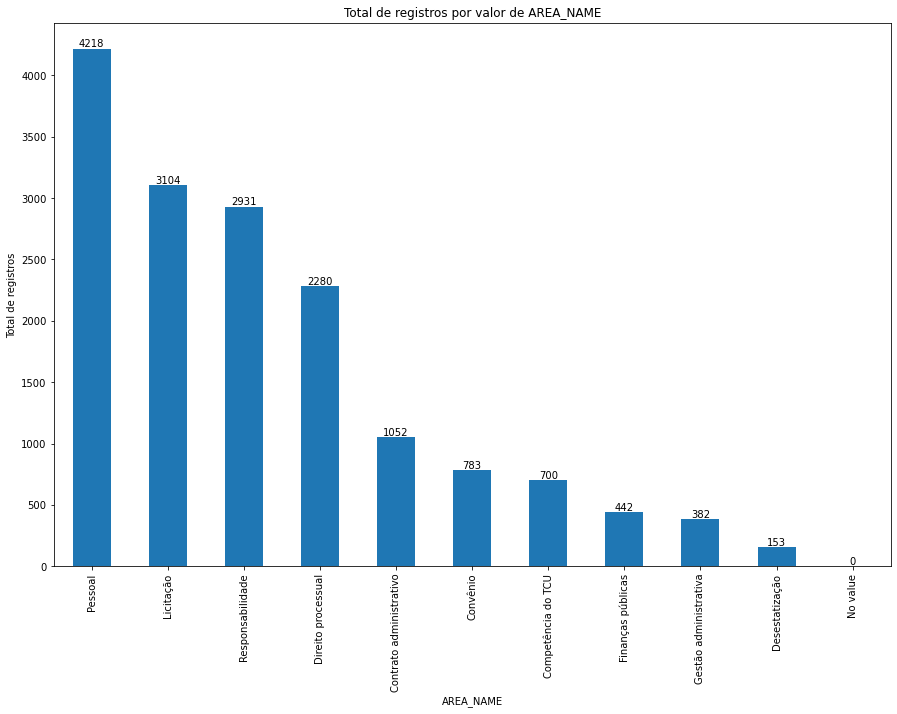

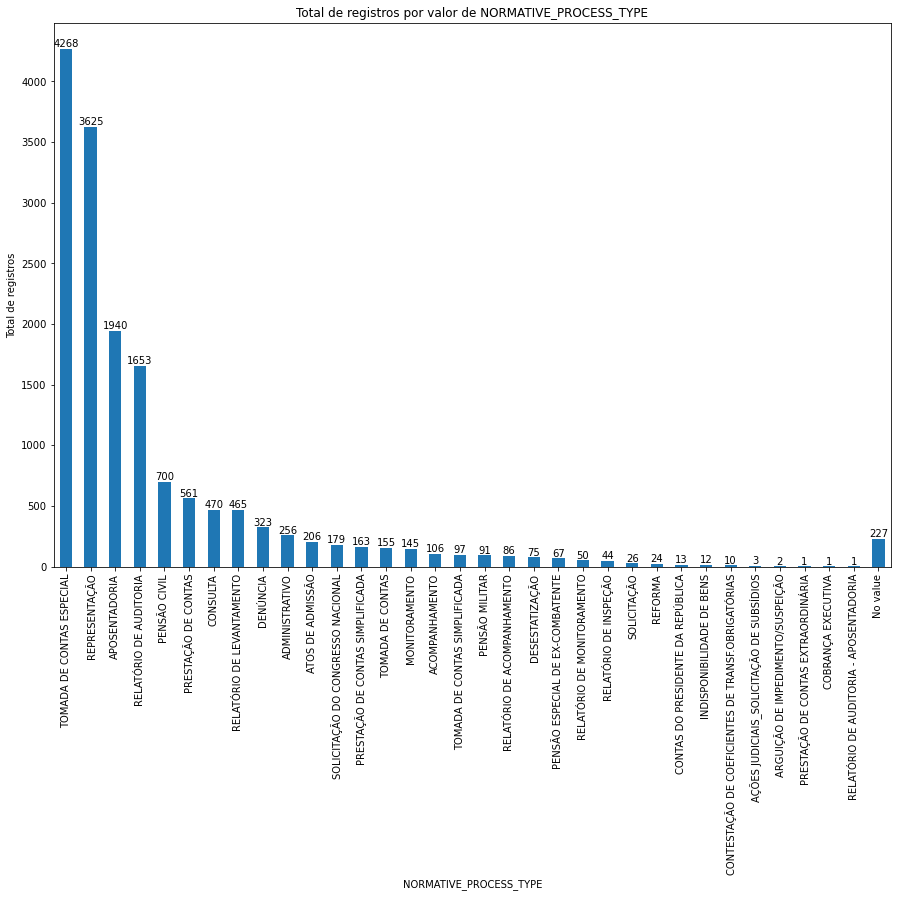

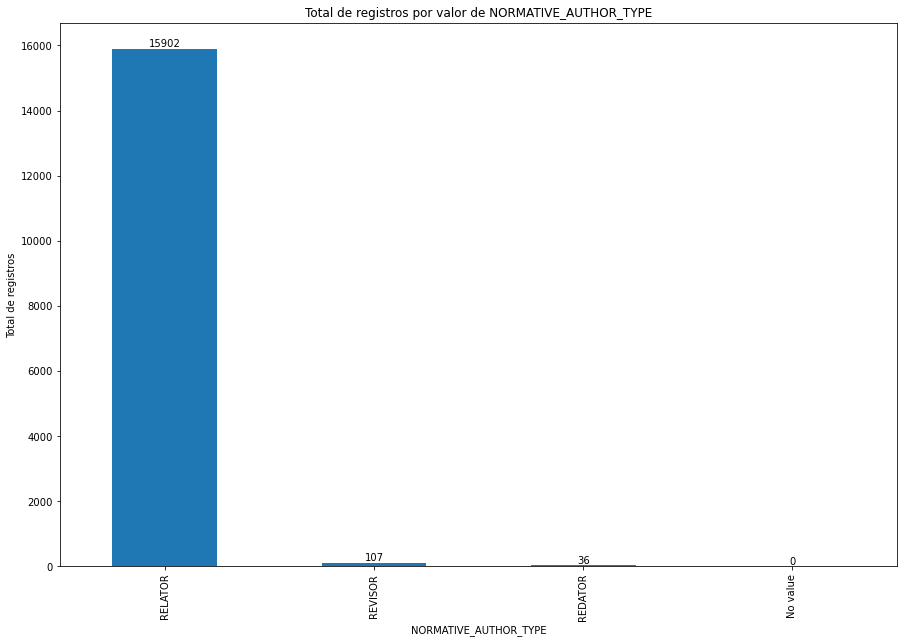

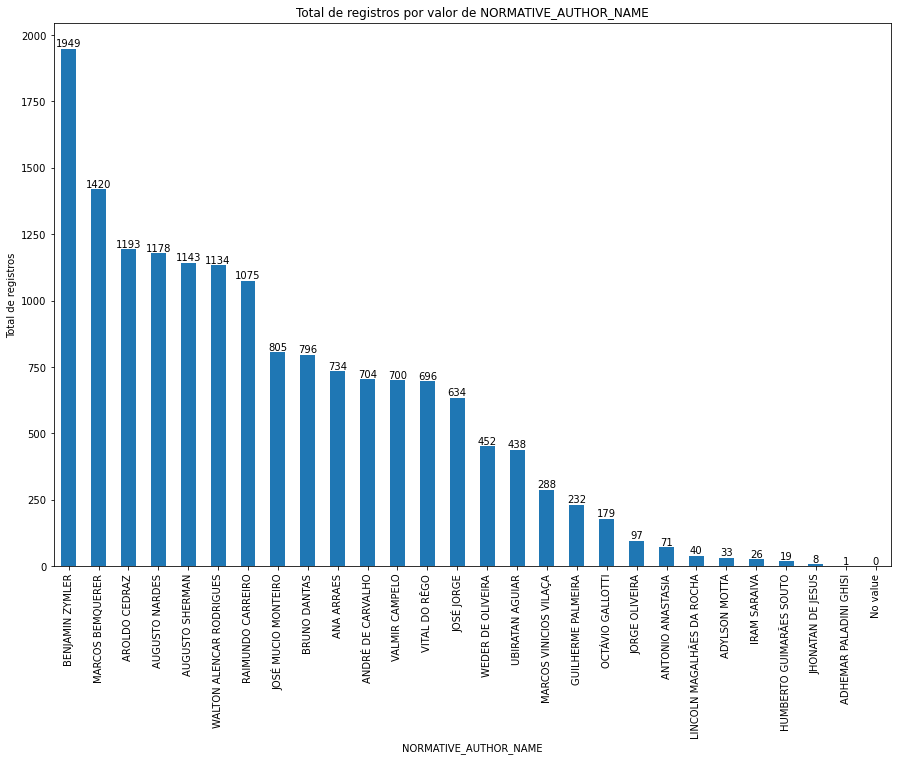

In [28]:
# Loop através das propriedades
for property_name in list_property:
    # Calcular o total de registros por valor da propriedade
    property_counts = df_enunciado[property_name].value_counts()

    # Obter o total de registros sem valor (sem registros)
    total_missing = df_enunciado[property_name].isna().sum()

    # Adicionar o total de registros sem valor no total de registros por valor
    property_counts['No value'] = total_missing

    # Plotar o gráfico de barras
    plt.figure(figsize=(15,10))
    property_counts.plot(kind='bar')
    plt.title(f'Total de registros por valor de {property_name}')
    plt.xlabel(property_name)
    plt.ylabel('Total de registros')

    # Adicionar rótulos com o total de registros em cada barra
    for i, v in enumerate(property_counts):
        plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')

    plt.show()

## Top normativos 

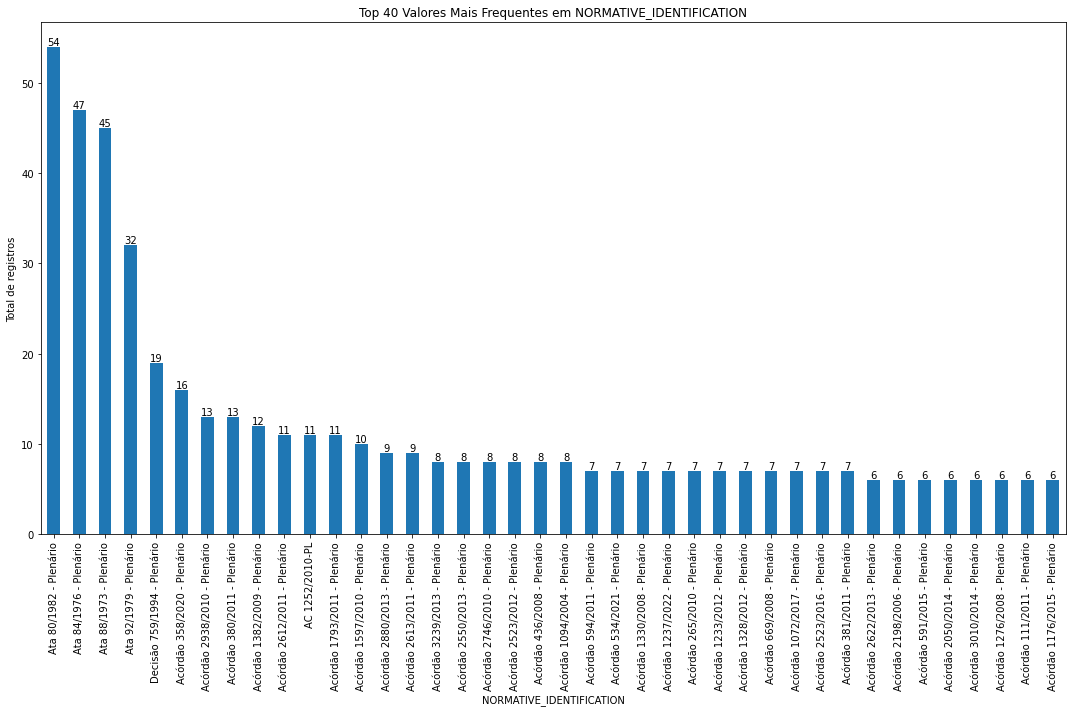

In [29]:
# Definir a coluna a ser explorada
column_name = 'NORMATIVE_IDENTIFICATION'

# Calcular o total de registros por valor na coluna
value_counts = df_enunciado[column_name].value_counts()

# Selecionar os top 40 valores mais frequentes
top_values = value_counts.head(40)

# Plotar o gráfico de barras
plt.figure(figsize=(15,10))
ax = top_values.plot(kind='bar')
plt.title(f'Top 40 Valores Mais Frequentes em {column_name}')
plt.xlabel(column_name)
plt.ylabel('Total de registros')
plt.xticks(rotation=90)
# Adicionar rótulos com o total de registros em cada barra
# Adicionar rótulos com a quantidade de registros em cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


plt.tight_layout()
plt.show()

## Por data da sessão

Mês a mês desde 2021

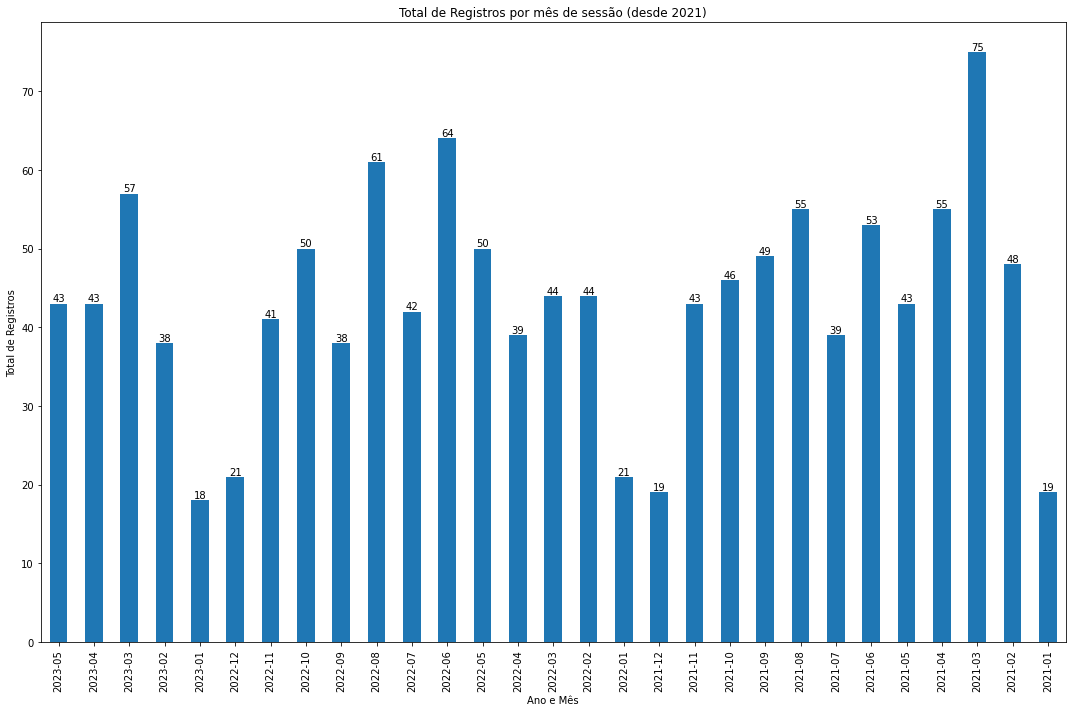

In [30]:
# Calcular o total de registros por ano e mês
df_enunciado['YearMonth'] = pd.to_datetime(df_enunciado[df_enunciado['NORMATIVE_DATE']>'2021']['NORMATIVE_DATE']).dt.to_period('M')
total_by_yearmonth = df_enunciado['YearMonth'].value_counts().sort_index(ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(15, 10))
ax = total_by_yearmonth.plot(kind='bar')
plt.title('Total de Registros por mês de sessão (desde 2021)')
plt.xlabel('Ano e Mês')
plt.ylabel('Total de Registros')
plt.xticks(rotation=90)

# Adicionar rótulos com a quantidade de registros em cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Por ano

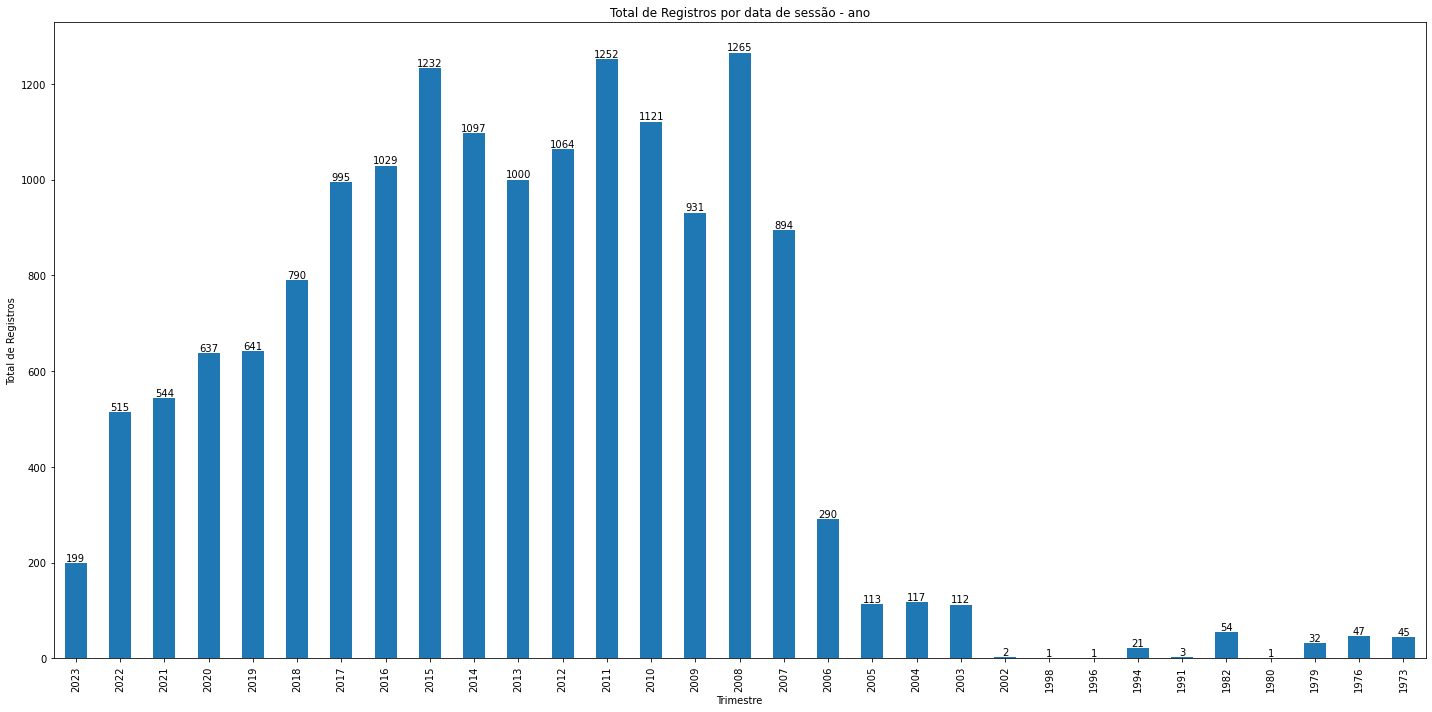

In [31]:

# Calcular o total de registros por trimestre
total_by_period = df_enunciado['NORMATIVE_DATE'].apply(lambda x: pd.Period(x, freq='Y')).value_counts().sort_index(ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(20, 10))
ax = total_by_period.plot(kind='bar')
plt.title('Total de Registros por data de sessão - ano')
plt.xlabel('Trimestre')
plt.ylabel('Total de Registros')
plt.xticks(rotation=90)
# Adicionar rótulos com a quantidade de registros em cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.tight_layout()
del total_by_period
plt.show()

Trimestre

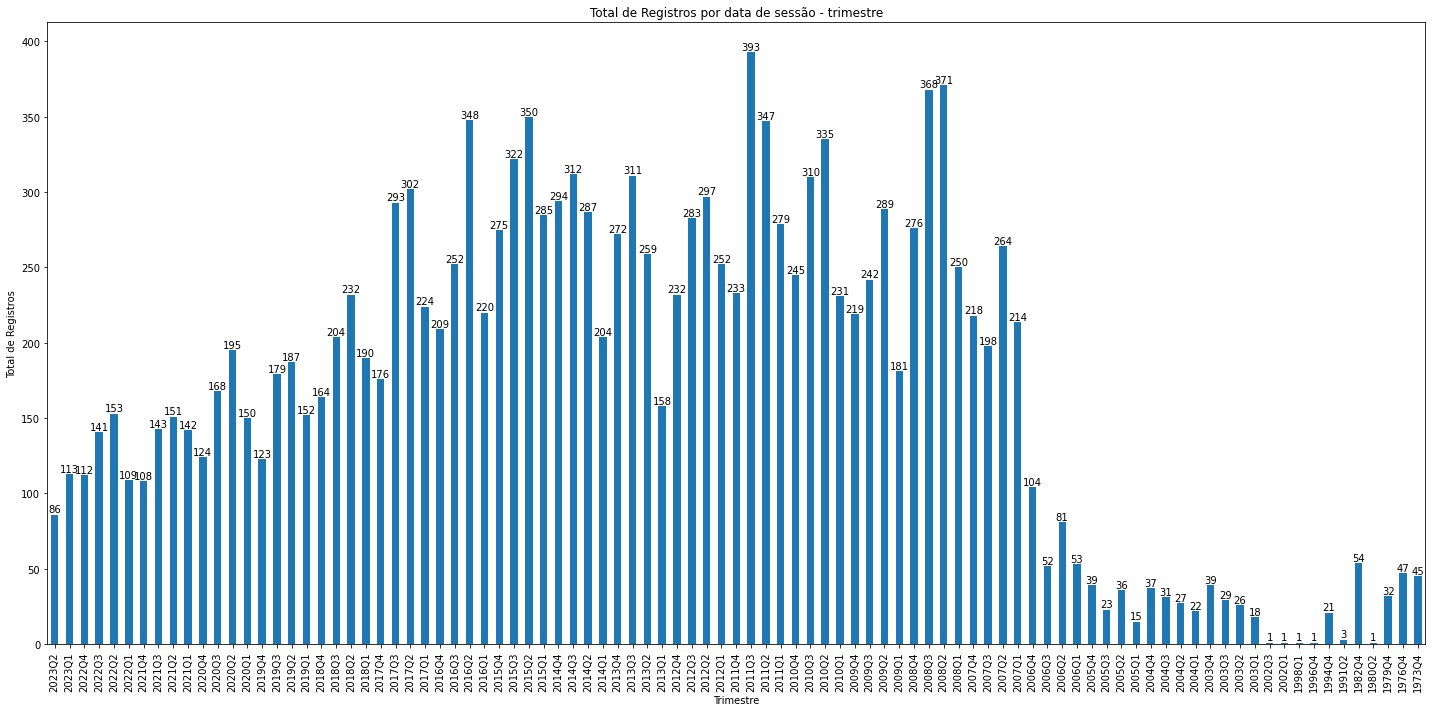

In [32]:

# Calcular o total de registros por trimestre
df_enunciado['YearQuarter'] = pd.to_datetime(df_enunciado['NORMATIVE_DATE']).dt.to_period('Q')
# total_by_period = df_enunciado['YearQuarter'].value_counts().sort_index(ascending=False)
# Calcular o total de registros por trimestre
total_by_period = df_enunciado['NORMATIVE_DATE'].apply(lambda x: pd.Period(x, freq='Q')).value_counts().sort_index(ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(20, 10))
ax = total_by_period.plot(kind='bar')
plt.title('Total de Registros por data de sessão - trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Total de Registros')
plt.xticks(rotation=90)
# Adicionar rótulos com a quantidade de registros em cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.tight_layout()
del total_by_period
plt.show()

## Tamanho dos textos (palavras, caracteres e tokens)

### Cálculo dos quantitativos

In [33]:
df_enunciado['LEN_TEXT_CHAR'] = df_enunciado['TEXT'].apply(len)

In [34]:
df_enunciado['LEN_TEXT_CHAR_LOG'] = round(np.log(df_enunciado['TEXT'].apply(len))).astype(int)


In [35]:
df_enunciado['NUM_WORD'] = df_enunciado['TEXT'].apply(lambda x: len(x.split()))


In [36]:
df_enunciado['NUM_TOKENS_MONOT5_3B'] = df_enunciado['TEXT'].apply(retorna_num_tokens, parm_tokenizador=tokenizador_pt_monot5_3b)

In [37]:
df_enunciado['NUM_TOKENS_MINILM'] = df_enunciado['TEXT'].apply(retorna_num_tokens, parm_tokenizador=tokenizador_pt_minilm)

### Gráficos

In [38]:
list_property_len = ['NUM_WORD', 'LEN_TEXT_CHAR', 'LEN_TEXT_CHAR_LOG', 'NUM_TOKENS_MONOT5_3B', 'NUM_TOKENS_MINILM']


In [39]:
df_enunciado[list_property_len].describe().round()

,NUM_WORD,LEN_TEXT_CHAR,LEN_TEXT_CHAR_LOG,NUM_TOKENS_MONOT5_3B,NUM_TOKENS_MINILM
count,16045.0,16045.0,16045.0,16045.0,16045.0
mean,47.0,307.0,6.0,88.0,70.0
std,24.0,158.0,1.0,47.0,38.0
min,6.0,41.0,4.0,13.0,10.0
25%,31.0,205.0,5.0,58.0,46.0
50%,43.0,279.0,6.0,80.0,63.0
75%,57.0,375.0,6.0,108.0,86.0
max,621.0,4212.0,8.0,1219.0,945.0


#### Histogramas

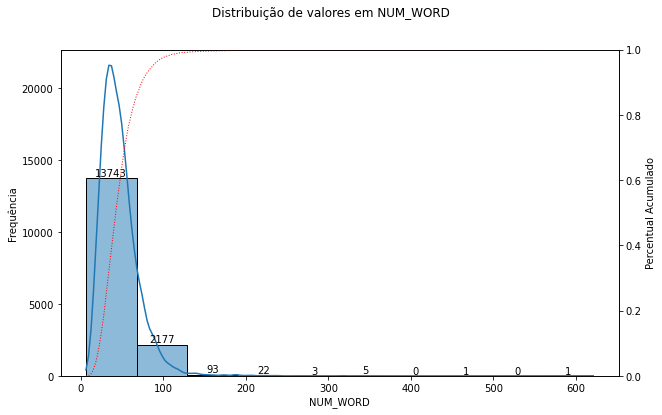

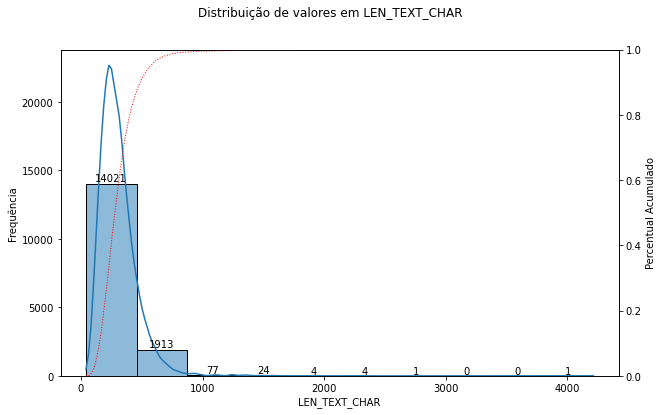

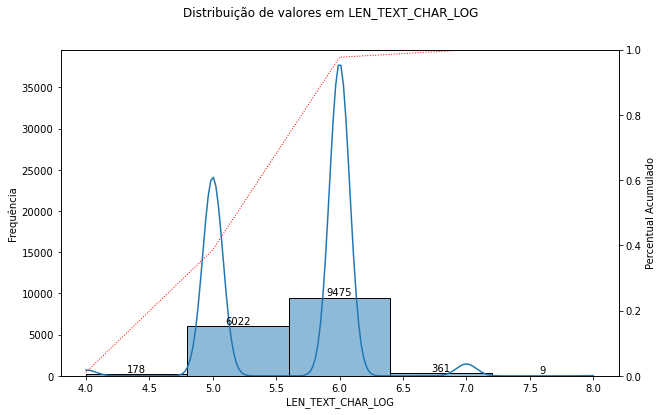

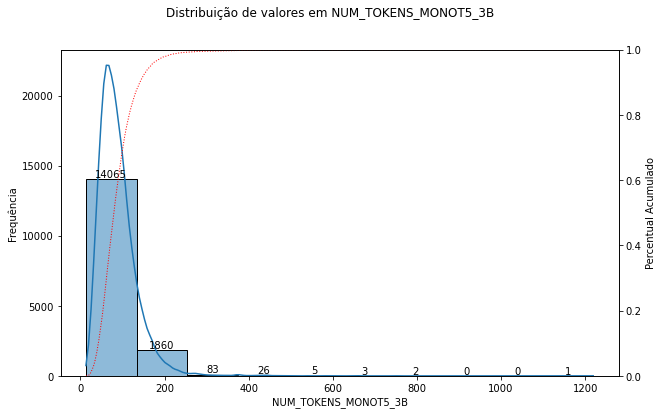

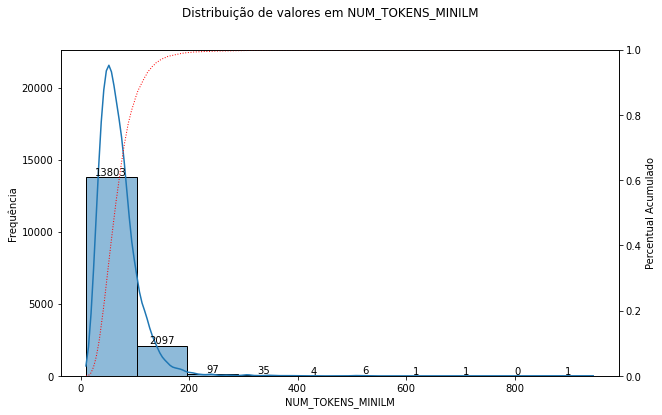

In [40]:
for property in list_property_len:
    if property == 'LEN_TEXT_CHAR_LOG':
        num_bins = 5
    else:
        num_bins = 10   
    f, ax = plt.subplots(1, 1, figsize=(10,6))
    f.suptitle(f'Distribuição de valores em {property}')    
    # Plot o histograma normalizado com KDE
    sns.histplot(data=df_enunciado[property], kde=True, ax=ax, linewidth=1, bins=num_bins)

    # Calcula o percentual acumulado
    cumulative = df_enunciado[property].value_counts(normalize=True).sort_index().cumsum()

    # Cria um novo eixo y com o percentual acumulado
    ax2 = ax.twinx()
    ax2.plot(cumulative.index, cumulative.values, linestyle='dotted', marker='', color='red', linewidth=1)
    ax2.set_ylim([0, 1])
    ax2.set_ylabel('Percentual Acumulado')

    # Adicionar valores nas barras
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

    ax.set_xlabel(property)
    ax.set_ylabel('Frequência')
plt.show()


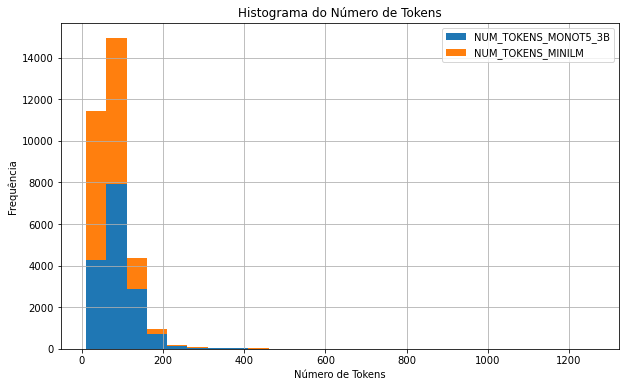

In [41]:
# Definir os limites dos intervalos
bin_width = 50
min_value = min(df_enunciado['NUM_TOKENS_MONOT5_3B'].min(), df_enunciado['NUM_TOKENS_MINILM'].min())
max_value = max(df_enunciado['NUM_TOKENS_MONOT5_3B'].max(), df_enunciado['NUM_TOKENS_MINILM'].max())
bins = np.arange(min_value, max_value + bin_width, bin_width)

# Plotar o histograma empilhado
plt.figure(figsize=(10, 6))
plt.hist([df_enunciado['NUM_TOKENS_MONOT5_3B'], df_enunciado['NUM_TOKENS_MINILM']], bins=bins, histtype='barstacked',
         label=['NUM_TOKENS_MONOT5_3B', 'NUM_TOKENS_MINILM'])
plt.title('Histograma do Número de Tokens')
plt.xlabel('Número de Tokens')
plt.ylabel('Frequência')
plt.grid(True)
plt.legend()

plt.show()

#### Limit analysis 

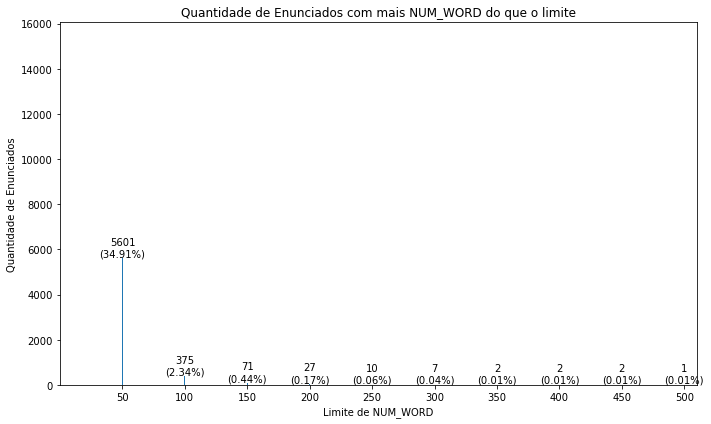

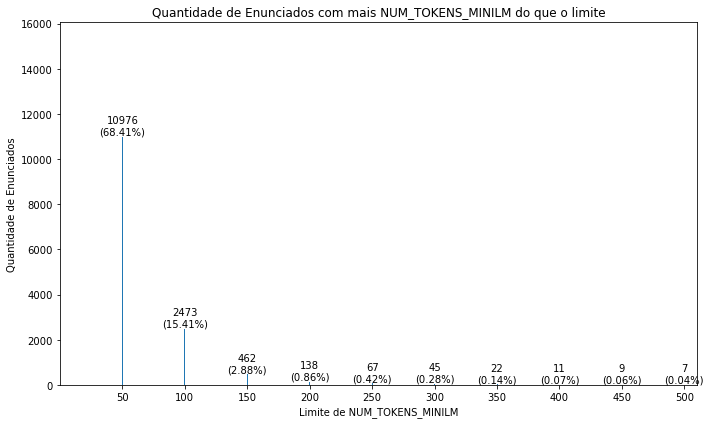

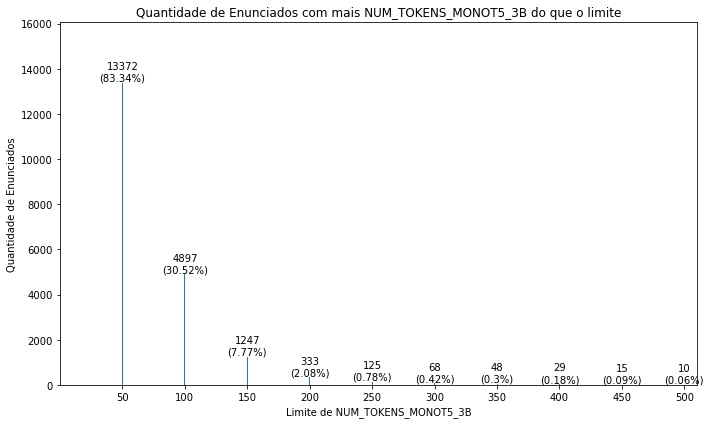

In [42]:
# Definir os limites mínimo e máximo para o eixo x
x_min = 50
x_max = 500

total = df_enunciado.shape[0]
# Definir o intervalo entre os valores do eixo x
x_interval = 50

# Calcular a quantidade de enunciados com mais registros do que cada valor em x
x_values = range(x_min, x_max+1 , x_interval)

for column in ['NUM_WORD', 'NUM_TOKENS_MINILM', 'NUM_TOKENS_MONOT5_3B']:
    y_values = [df_enunciado[df_enunciado[column] > x].shape[0] for x in x_values]

    # Criar o gráfico de barras
    plt.figure(figsize=(10, 6))
    bars = plt.bar(x_values, y_values)

    # Adicionar os valores nas barras
    for bar in bars:
        height = bar.get_height()
        percentage = round(100 * height / total, 2)
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height}\n({percentage}%)", ha='center', va='bottom')

    # Configurar o título e rótulos dos eixos
    plt.title(f'Quantidade de Enunciados com mais {column} do que o limite')
    plt.xlabel(f'Limite de {column}')
    plt.ylabel('Quantidade de Enunciados')

    # Configurar os ticks e rótulos do eixo x
    plt.xticks(x_values)
    plt.xlim(0, x_max + 10)
    plt.ylim(0, total + 10)

    # Exibir o gráfico
    plt.tight_layout()
plt.show()

# Data exploration of indexing (qrel)

In [43]:
df_index = pd.read_csv(PATH_QREL)

In [44]:
df_index.shape

(94809, 3)

In [45]:
df_index.head()

,ID_QUERY,ID_DOCTO,TYPE
0,158,15147,INDEXACAO_EXTRA
1,37,15147,INDEXACAO_EXTRA
2,178,15147,INDEXACAO_EXTRA
3,14564,15147,INDEXACAO_EXTRA
4,9219,15147,INDEXACAO_EXTRA


Agregar nome do termo

In [46]:
df_doc = pd.read_csv(PATH_DOC)

In [47]:
df_doc.head()

,TEXT,ID,NAME,DATE_REFERENCE,CLASS,HAS_SCOPE_NOTE,HAS_DEFINITION,HAS_SYNONYM,HAS_EXAMPLE,HAS_ENGLISH_TRANSLATION,HAS_SPECIALIZATION,HAS_RELATED_TERM,HAS_SPANISH_TRANSLATION,HAS_GENERALIZATION,TEXT_DEFINITION,TEXT_SYNONYM,TEXT_RELATED_TERM,TEXT_SCOPE_NOTE,TEXT_EXAMPLE,TEXT_ENGLISH_TRANSLATION,TEXT_SPANISH_TRANSLATION,TEXT_SPECIALIZATION,TEXT_GENERALIZATION,COUNT_INDEX_AREA,COUNT_INDEX_THEME,COUNT_INDEX_SUBTHEME,COUNT_INDEX_EXTRA,COUNT_INDEX_TOTAL
0,"O termo é ""Abandono de cargo"".\nAbandono de cargo tem definição: ""Configura abandono de cargo a ...",1,Abandono de cargo,20230614,Termo,1,1,1,0,1,0,1,1,0,Configura abandono de cargo a ausência intencional do servidor ao serviço por mais de trinta dia...,Abandono de função e Abandono do cargo.,"Abandono de emprego, Deserção, Falta grave, Função pública, Demissão de servidor, Inassiduidade ...",Artigo 323 Código Penal,NaN,Abandonment of office.,Abandono de puesto.,NaN,NaN,0,1,0,0,1
1,"O termo é ""Abastecimento de tropas e meios"".\nAbastecimento de tropas e meios é uma especializaç...",2,Abastecimento de tropas e meios,20230614,Termo,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN,NaN,NaN,Supply of troops and means.,Abastecimiento de tropas y medios e Suministro de tropas y médios.,Abastecimento.,NaN,0,0,0,1,1
2,"O termo é ""Tropa"".\nTropa tem definição: ""Termo coletivo que designa o pessoal de uma organizaçã...",3,Tropa,20230614,Termo,0,1,0,0,1,0,1,1,0,Termo coletivo que designa o pessoal de uma organização militar.,NaN,Organização militar e Missão.,NaN,NaN,Troop.,Tropa.,NaN,NaN,0,0,0,0,0
3,"O termo é ""Abono de faltas"".\nAbono de faltas tem definição: ""É a relevação da falta, de forma q...",4,Abono de faltas,20230614,Termo,1,1,1,0,0,0,1,0,0,"É a relevação da falta, de forma que o servidor não sofra qualquer desconto pelo dia não trabalh...","Faltas, Abono das faltas e Abono de ausências.",Inassiduidade habitual e Afastamento de pessoal.,Usado para servidores regidos pela CLT (art. 473).,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1
4,"O termo é ""Abono de permanência em serviço"".\nAbono de permanência em serviço tem definição: ""O ...",5,Abono de permanência em serviço,20230614,Termo,0,1,1,0,0,0,1,0,0,O abono de permanência será pago ao servidor que tiver preenchido as exigências para aposentador...,"Abono de permanência, Adicional de permanência e Abono permanência.","Aposentadoria voluntária, Contribuição previdenciária e Regime Próprio de Previdência Social.",NaN,NaN,NaN,NaN,NaN,NaN,0,7,0,4,11


In [48]:
assert df_index.merge(df_doc[['ID', 'NAME']], how='inner', left_on='ID_DOCTO', right_on='ID').shape[0] == df_index.shape[0], f"It is missing document in DOC file."

In [49]:
df_index = df_index.merge(df_doc[['ID', 'NAME', 'CLASS']], how='inner', left_on='ID_DOCTO', right_on='ID').drop('ID', axis=1)

In [50]:
df_index.head()

,ID_QUERY,ID_DOCTO,TYPE,NAME,CLASS
0,158,15147,INDEXACAO_EXTRA,Referência,Termo
1,37,15147,INDEXACAO_EXTRA,Referência,Termo
2,178,15147,INDEXACAO_EXTRA,Referência,Termo
3,14564,15147,INDEXACAO_EXTRA,Referência,Termo
4,9219,15147,INDEXACAO_EXTRA,Referência,Termo


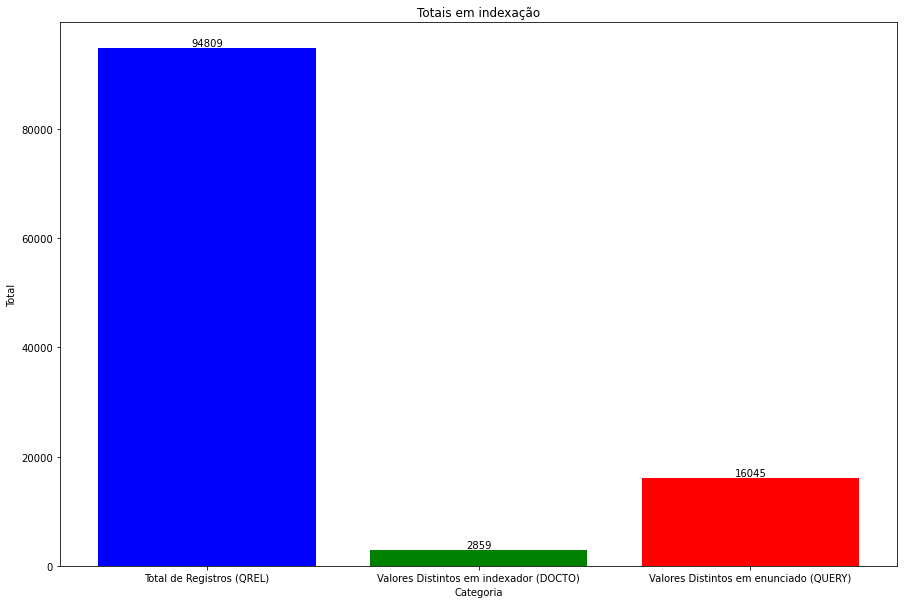

In [51]:
# Calcular os valores
total_registros = len(df_index)
valores_distintos_docto = df_index['ID_DOCTO'].nunique()
valores_distintos_query = df_index['ID_QUERY'].nunique()

# Criar os rótulos das barras
labels = ['Total de Registros (QREL)', 'Valores Distintos em indexador (DOCTO)', 'Valores Distintos em enunciado (QUERY)']

# Criar os valores das barras
valores = [total_registros, valores_distintos_docto, valores_distintos_query]

# Definir as cores das barras
cores = ['blue', 'green', 'red']

# Plotar o gráfico de barras
plt.figure(figsize=(15, 10))
plt.bar(labels, valores, color=cores)
plt.title('Totais em indexação')
plt.xlabel('Categoria')
plt.ylabel('Total')

# Adicionar os valores sobre as barras
for i, valor in enumerate(valores):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.show()


In [52]:
list_property = ['TYPE','CLASS']

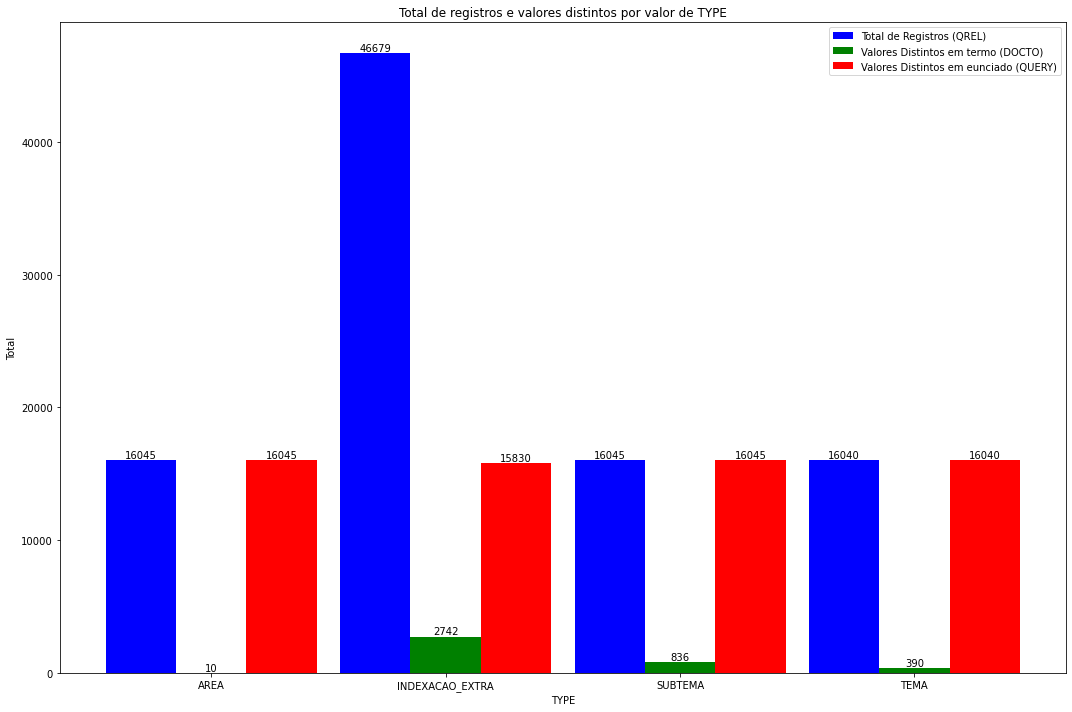

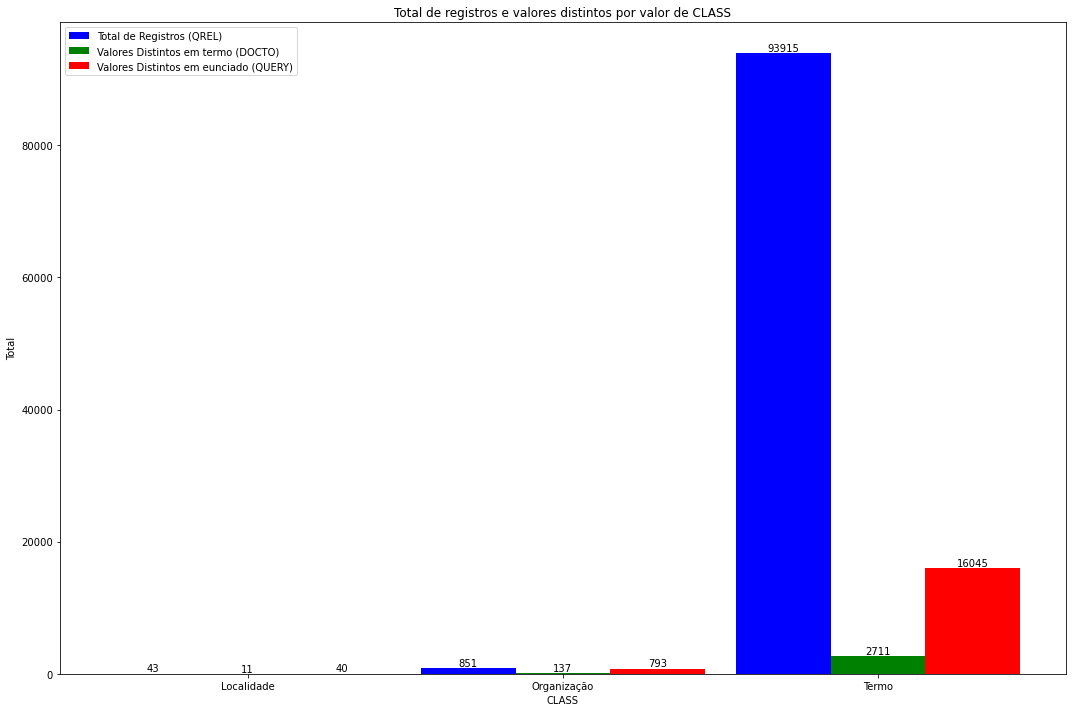

In [53]:
colors = ['blue', 'green', 'red']

for property_name in list_property:
    # Agrupar o DataFrame por valor da propriedade
    grouped_data = df_index.groupby(property_name)

    # Calcular o total de registros, valores distintos em 'ID_DOCTO' e valores distintos em 'ID_QUERY' para cada valor da propriedade
    total_counts = grouped_data.size()
    distinct_counts_docto = grouped_data['ID_DOCTO'].nunique()
    distinct_counts_query = grouped_data['ID_QUERY'].nunique()

    # Obter os rótulos únicos
    labels = total_counts.index

    # Definir a largura das barras
    bar_width = 0.3

    # Calcular a posição das barras para cada label distinto
    positions = np.arange(len(labels))

    # Plotar o gráfico de barras
    plt.figure(figsize=(15, 10))

    # Plotar a primeira barra
    plt.bar(positions - bar_width, total_counts, width=bar_width, color=colors[0], label='Total de Registros (QREL)')

    # Plotar a segunda barra
    plt.bar(positions, distinct_counts_docto, width=bar_width, color=colors[1], label='Valores Distintos em termo (DOCTO)')

    # Plotar a terceira barra
    plt.bar(positions + bar_width, distinct_counts_query, width=bar_width, color=colors[2], label='Valores Distintos em eunciado (QUERY)')

    plt.title(f'Total de registros e valores distintos por valor de {property_name}')
    plt.xlabel(property_name)
    plt.ylabel('Total')
    plt.legend()

    # Adicionar rótulos com os valores em cada barra
    for i, label in enumerate(labels):
        plt.text(i-0.3, total_counts[i], str(total_counts[i]), ha='center', va='bottom')
        plt.text(i, distinct_counts_docto[i], str(distinct_counts_docto[i]), ha='center', va='bottom')
        plt.text(i+0.3, distinct_counts_query[i], str(distinct_counts_query[i]), ha='center', va='bottom')

    plt.xticks(ticks=positions, labels=labels)
    plt.tight_layout()
    plt.show()


Ver indexações por termo

Mais usados

In [54]:
# Criar o DataFrame df_index_docto
df_index_docto = df_index.groupby(['ID_DOCTO','NAME'])['TYPE'].value_counts().unstack(fill_value=0)


In [55]:
# Resetar o índice
df_index_docto = df_index_docto.reset_index()

# Calcular a soma das colunas de TYPE
df_index_docto['TOTAL'] = df_index_docto.drop(['ID_DOCTO','NAME'],axis=1).sum(axis=1)

In [56]:
df_index_docto.shape

(2859, 7)

In [57]:
df_index_docto.head()

TYPE,ID_DOCTO,NAME,AREA,INDEXACAO_EXTRA,SUBTEMA,TEMA,TOTAL
0,1,Abandono de cargo,0,0,0,1,1
1,2,Abastecimento de tropas e meios,0,1,0,0,1
2,4,Abono de faltas,0,1,0,0,1
3,5,Abono de permanência em serviço,0,4,0,7,11
4,7,Absolvição,0,2,0,0,2


In [58]:
df_sorted = df_index_docto.sort_values(by='TOTAL', ascending=False).iloc[:50]

In [59]:
df_sorted.head()

TYPE,ID_DOCTO,NAME,AREA,INDEXACAO_EXTRA,SUBTEMA,TEMA,TOTAL
474,1131,Pessoal,4218,26,0,60,4304
398,932,Licitação,3104,168,3,285,3560
344,775,Responsabilidade,2931,48,0,0,2979
1430,5288,Direito processual,2280,1,0,0,2281
177,342,Convênio,783,153,1,753,1690


In [60]:
list_property = ['AREA','TEMA', 'SUBTEMA','INDEXACAO_EXTRA','TOTAL']

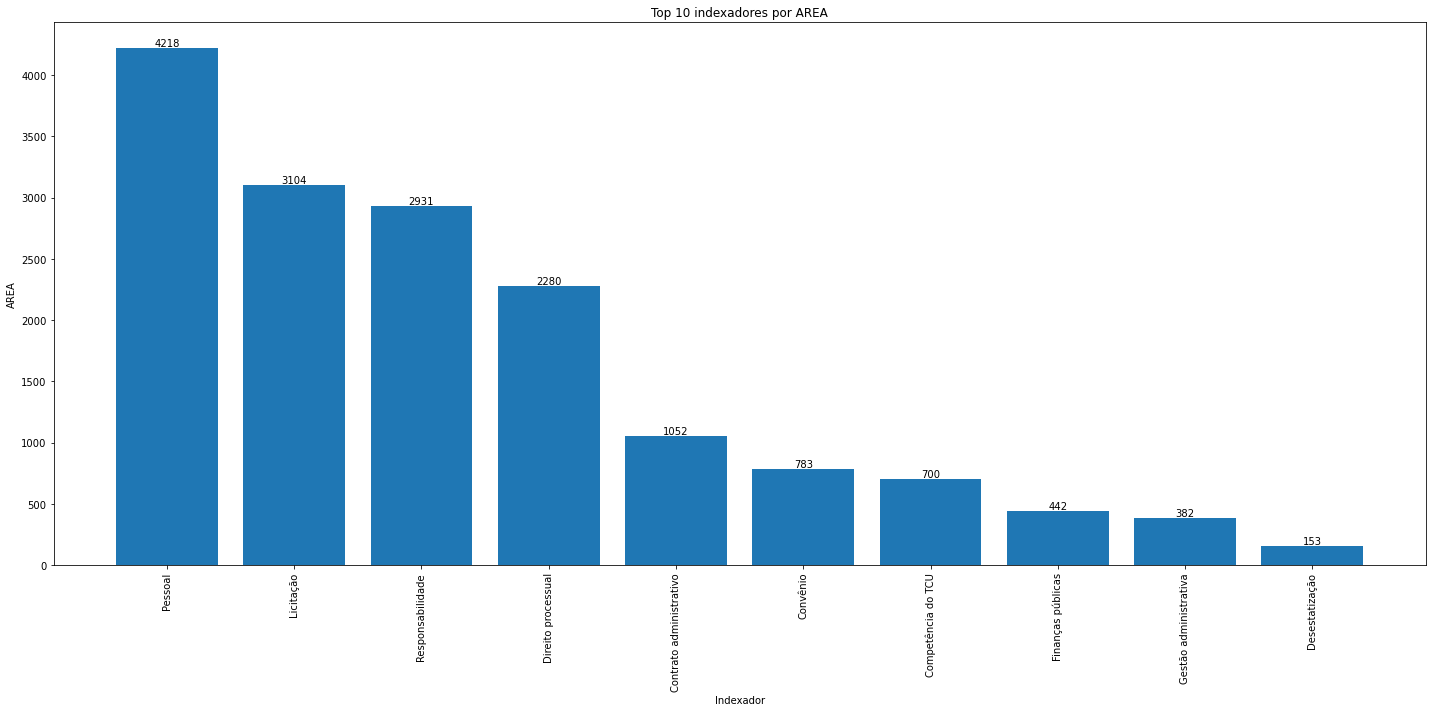

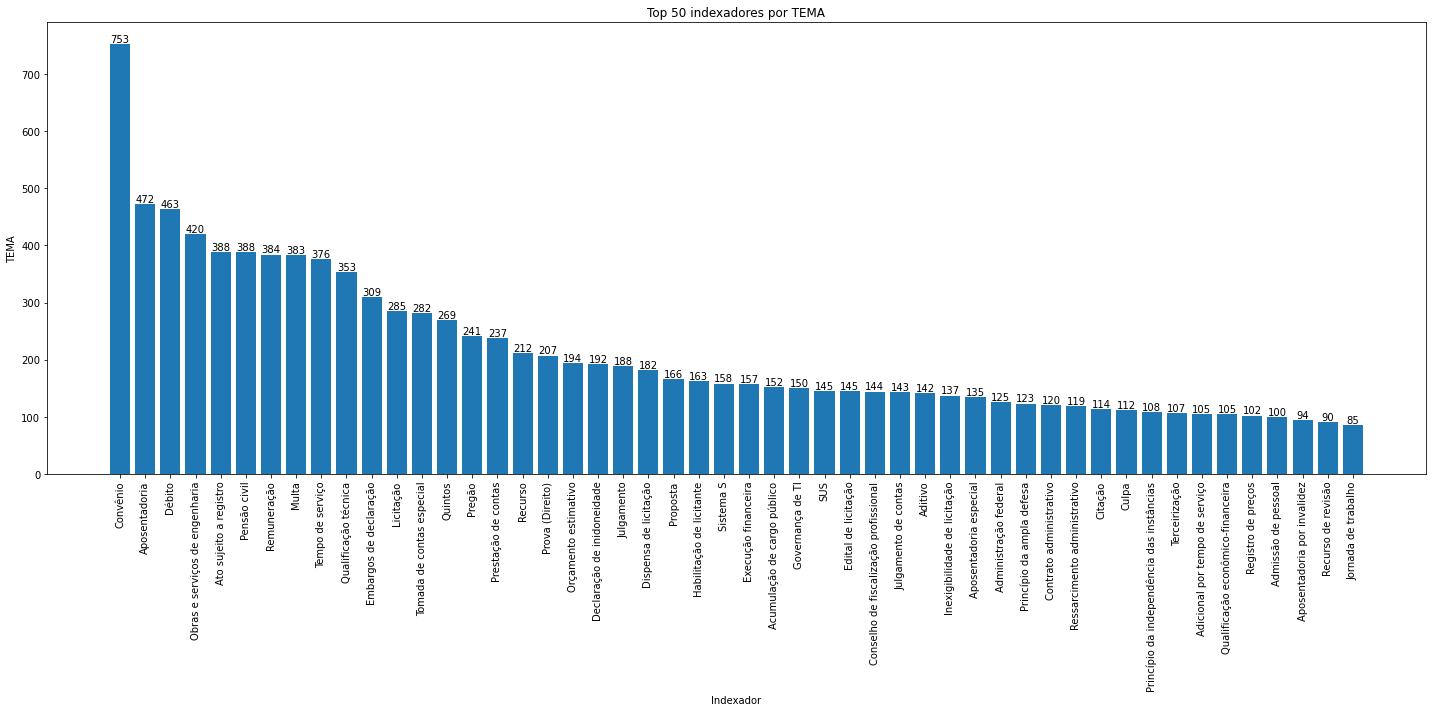

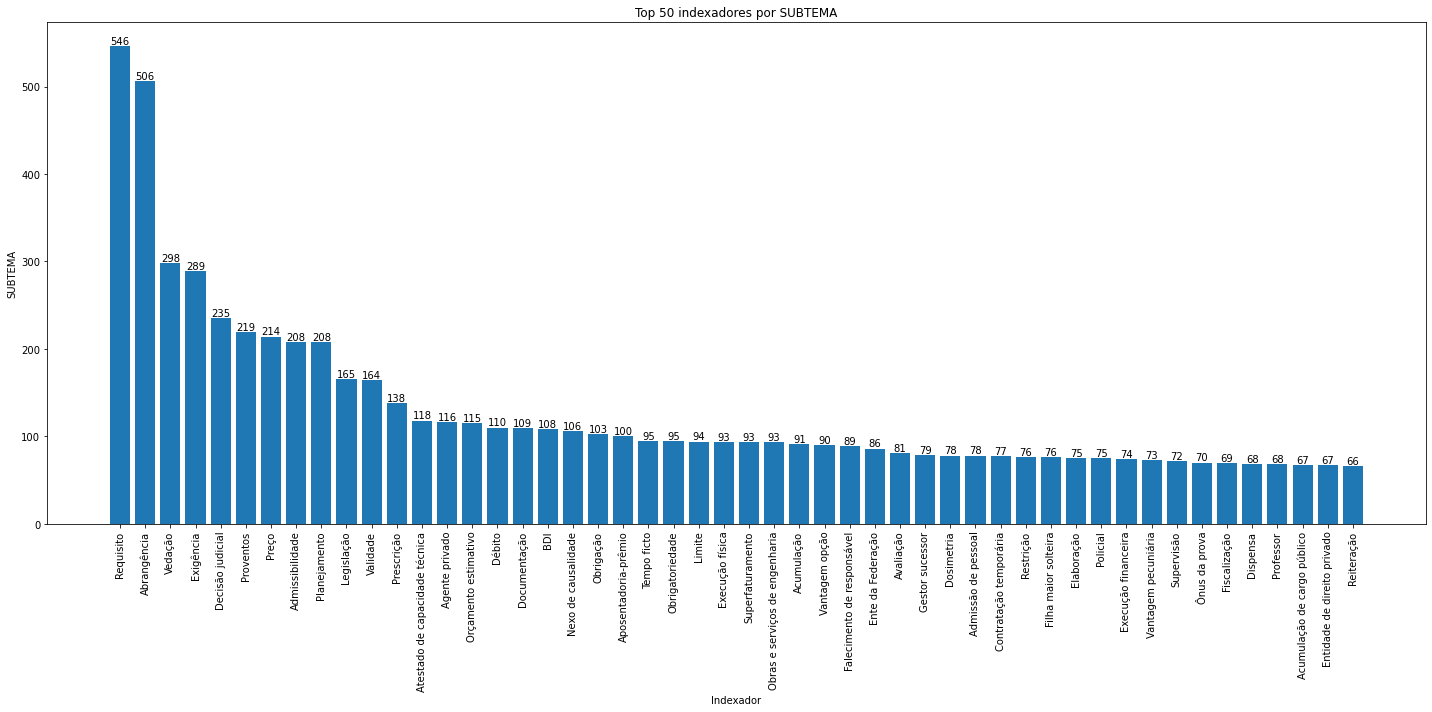

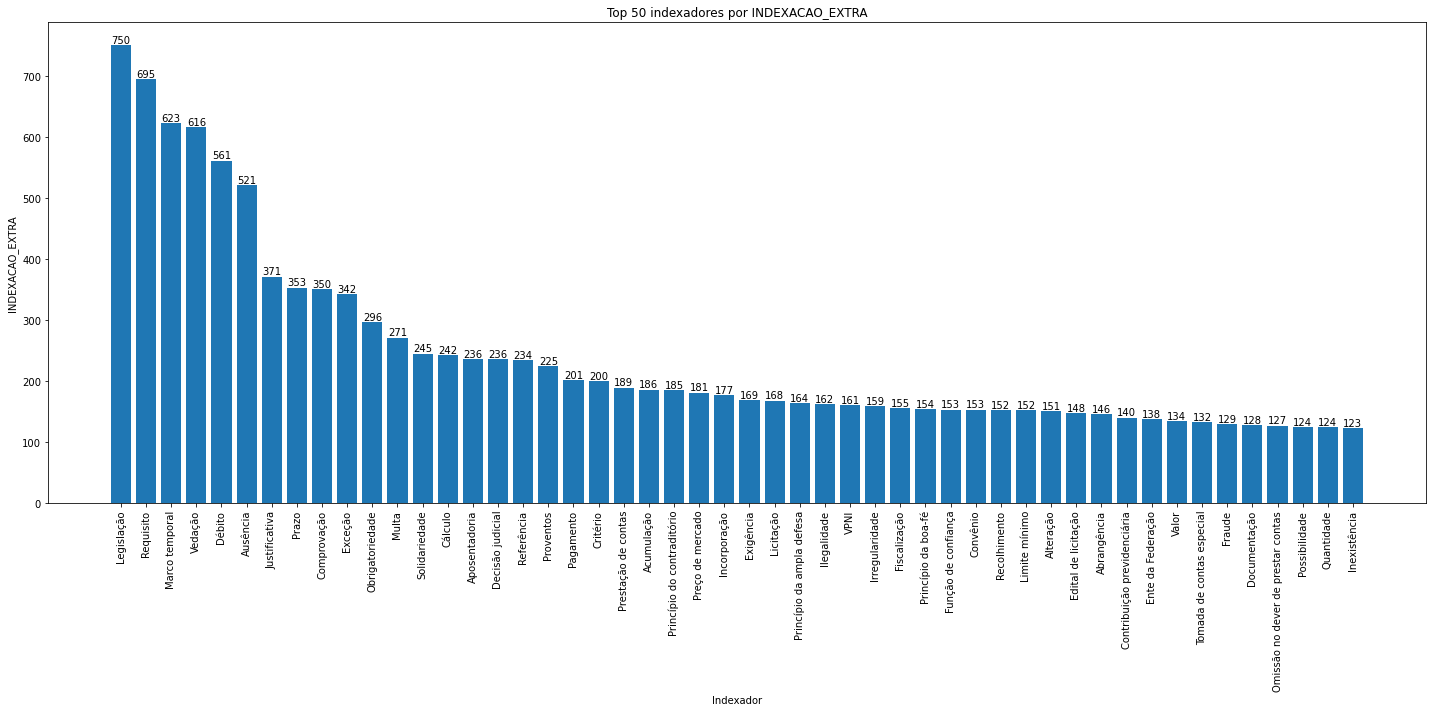

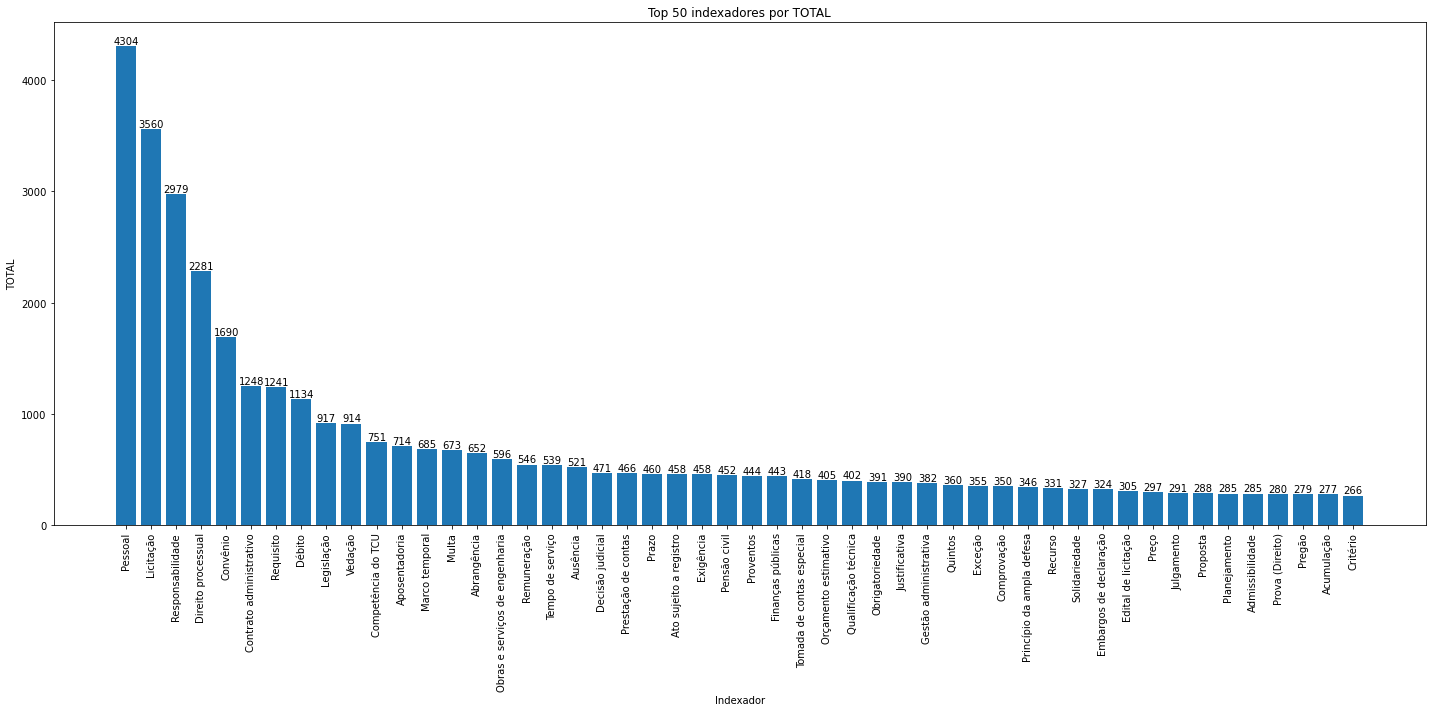

In [61]:
for property in list_property:
    if property == 'AREA':
        top_k = 10
    else:
        top_k = 50

    # Ordenar o DataFrame por 'TOTAL' em ordem decrescente
    df_sorted = df_index_docto.sort_values(by=property, ascending=False).iloc[:top_k]

    # Criar o gráfico de barras
    plt.figure(figsize=(20, 10))
    bars = plt.bar(df_sorted['NAME'], df_sorted[property])
    plt.title(f'Top {top_k} indexadores por {property}')
    plt.xlabel('Indexador')
    plt.ylabel(property)
    plt.xticks(rotation=90)
    plt.tight_layout()

    # Adicionar o valor na parte superior de cada barra
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

    plt.show()


In [62]:
df_index_docto[list_property].describe().round(2)

TYPE,AREA,TEMA,SUBTEMA,INDEXACAO_EXTRA,TOTAL
count,2859.00,2859.00,2859.00,2859.00,2859.00
mean,5.61,5.61,5.61,16.33,33.16
std,123.65,34.05,23.01,41.14,149.27
min,0.00,0.00,0.00,0.00,1.00
25%,0.00,0.00,0.00,1.00,2.00
50%,0.00,0.00,0.00,5.00,6.00
75%,0.00,0.00,1.00,15.00,23.00
max,4218.00,753.00,546.00,750.00,4304.00


In [63]:
print(f"Total de grupos de termos: {df_index_docto.shape[0]} tendo indexações:  mediana {df_index_docto[list_property].describe().round(2)['TOTAL']['50%']}  média {df_index_docto[list_property].describe().round(2)['TOTAL']['mean']}")  # Contar as ocorrências de cada lista de nomes


Total de grupos de termos: 2859 tendo indexações:  mediana 6.0  média 33.16


Ver conjuntos de indexações

In [64]:
# Agrupar o DataFrame por ID_QUERY e obter as listas de valores
df_index_query = df_index.groupby('ID_QUERY').agg({'NAME': lambda x: sorted(set(x))})


# Renomear as colunas
df_index_query = df_index_query.rename(columns={'NAME': 'LIST_NAME'})


In [65]:
df_index_query = df_index_query.reset_index()

In [66]:
# Criar o dicionário de mapeamento de valores
name_to_id_dict = dict(zip(df_doc['NAME'], df_doc['ID']))

# Mapear os valores em LIST_ID_DOCTO com base nos nomes em LIST_NAME
df_index_query['LIST_ID_DOCTO'] = df_index_query['LIST_NAME'].apply(lambda x: [name_to_id_dict[name] for name in x])



In [67]:
df_index_query.shape

(16045, 3)

In [68]:
df_index_query.head()

,ID_QUERY,LIST_NAME,LIST_ID_DOCTO
0,5,"[Aposentadoria-prêmio, Doença, Pensão especial, Pessoal, Proventos, Viúvo]","[15340, 15961, 1113, 1131, 1298, 5106]"
1,6,"[Cargo em comissão, Doença, Pensão especial, Pessoal, Viúvo]","[207, 15961, 1113, 1131, 5106]"
2,7,"[Arquivamento, Caso fortuito, Contas iliquidáveis, Direito processual, Força maior, Tomada de co...","[108, 223, 1727, 5288, 650, 1526]"
3,8,"[Aposentadoria, Legislação, Pessoal, Reclassificação de cargo]","[92, 887, 1131, 1100820]"
4,9,"[Abrangência, Administração federal, Competência do TCU, Prestação de contas, Sociedade de econo...","[14715, 46, 5095, 1215, 1480]"


In [69]:
# assert df_doc[df_doc['ID'].isin(['ID_QUERY', 'LIST_NAME', 'LIST_ID_DOCTO'][df_index_query['ID_QUERY']==5]['LIST_ID_DOCTO'][0])].sort_values(by='NAME')['NAME'].values.tolist() == df_index_query[df_index_query['ID_QUERY']==5]['LIST_NAME'][0], 'Não está ok a ordenação!'

In [70]:
df_index_query['LIST_NAME'] = df_index_query['LIST_NAME'].apply(tuple)  # Converter a lista em tupla para torná-la hashable


In [71]:
df_index_query['COUNT_NAME'] = df_index_query['LIST_NAME'].apply(lambda x: len(x))


Número de termos

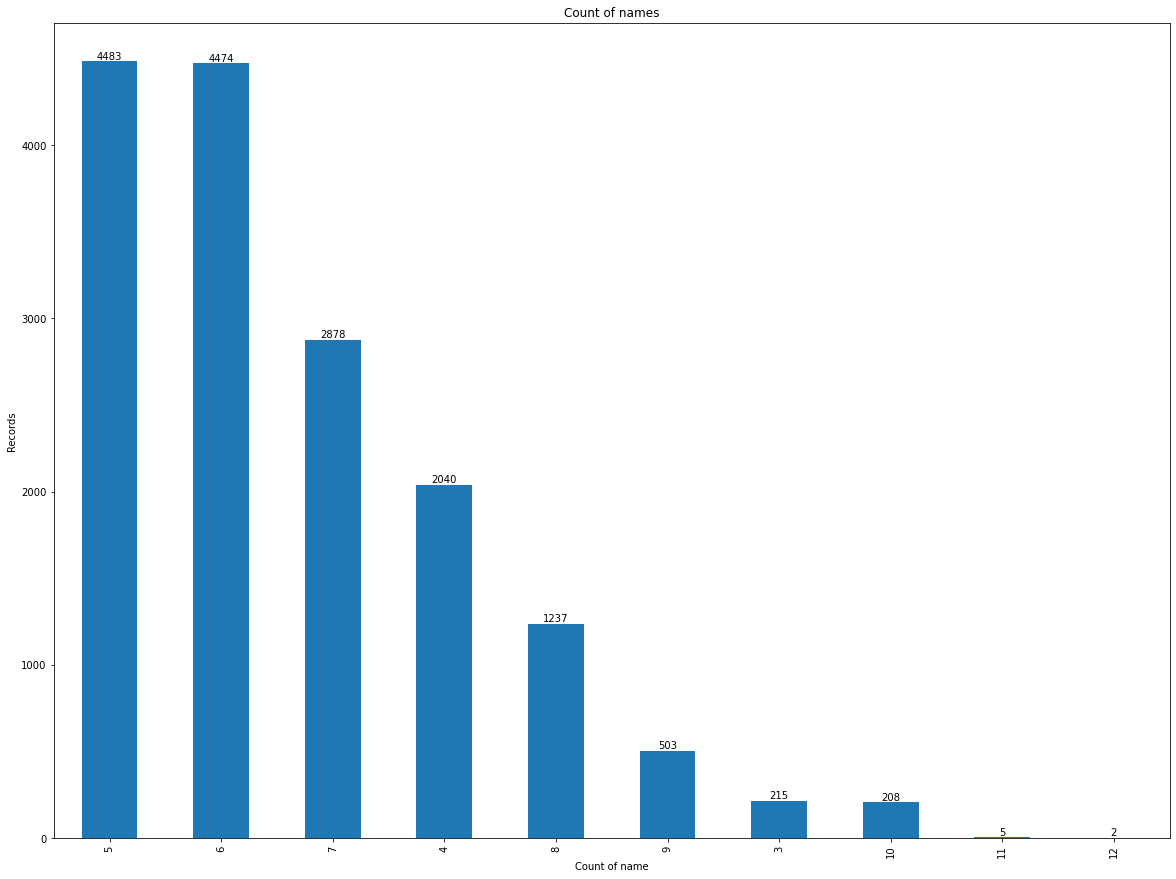

In [72]:
plt.figure(figsize=(20, 15))
counts = df_index_query['COUNT_NAME'].value_counts()
counts.plot(kind='bar')

plt.title('Count of names')
plt.xlabel('Count of name')
plt.ylabel('Records')

plt.xticks(rotation=90)

# Adicionar valor nas barras
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


Mais usados

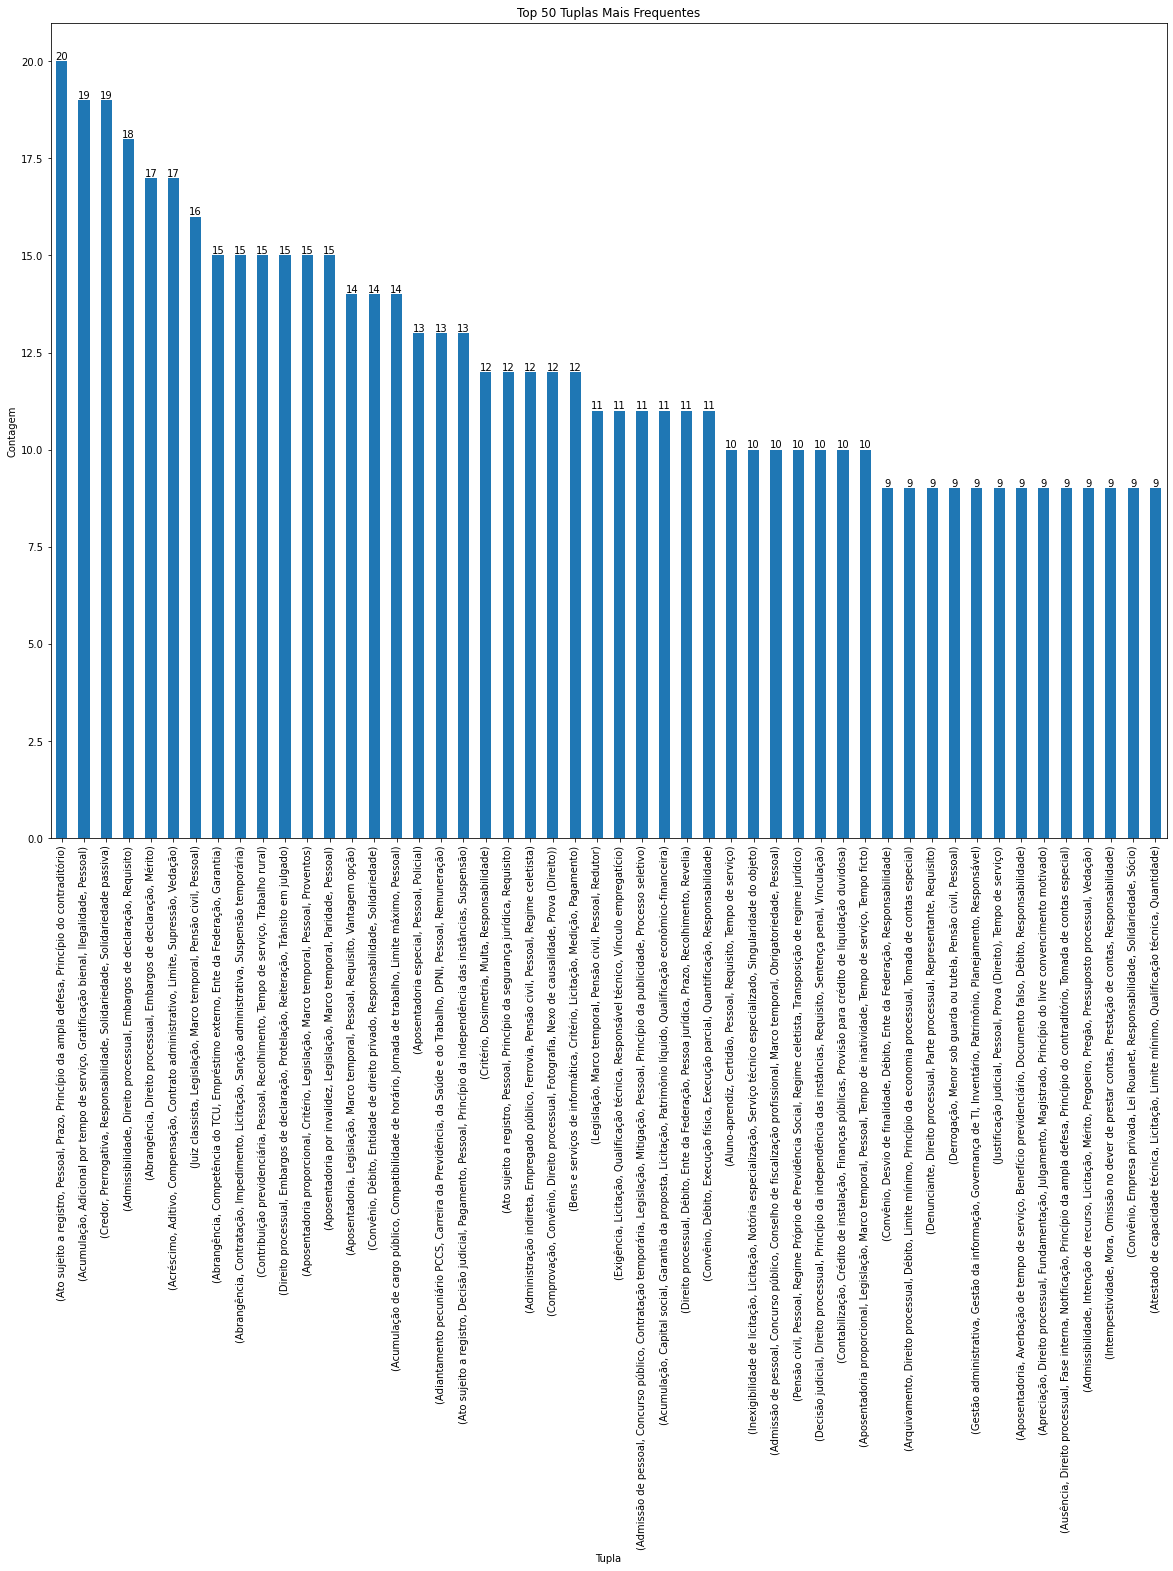

In [73]:
top_k = 50  # Defina o número de tuplas mais frequentes a serem exibidas

# Contar as ocorrências de cada tupla
count_by_name = df_index_query['LIST_NAME'].value_counts().head(top_k)

# Plotar o gráfico de barras
plt.figure(figsize=(20, 15))
count_by_name.plot(kind='bar')

plt.title(f'Top {top_k} Tuplas Mais Frequentes')
plt.xlabel('Tupla')
plt.ylabel('Contagem')

plt.xticks(rotation=90)

# Adicionar valor nas barras
for i, count in enumerate(count_by_name):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


In [74]:
df_index_query['LIST_NAME'].value_counts().describe().round(2)

count    11893.00
mean         1.35
std          1.13
min          1.00
25%          1.00
50%          1.00
75%          1.00
max         20.00
Name: LIST_NAME, dtype: float64

In [75]:
print(f"Total de grupos de termos: {df_index_query['LIST_NAME'].value_counts().shape[0]} tendo indexações: em mediana {df_index_query['LIST_NAME'].value_counts().describe().round(2)['50%']},  em média {df_index_query['LIST_NAME'].value_counts().describe().round(2)['mean']}") 


Total de grupos de termos: 11893 tendo indexações: em mediana 1.0,  em média 1.35


# Exploration of DOCTO

In [76]:
df_doc.head()

,TEXT,ID,NAME,DATE_REFERENCE,CLASS,HAS_SCOPE_NOTE,HAS_DEFINITION,HAS_SYNONYM,HAS_EXAMPLE,HAS_ENGLISH_TRANSLATION,HAS_SPECIALIZATION,HAS_RELATED_TERM,HAS_SPANISH_TRANSLATION,HAS_GENERALIZATION,TEXT_DEFINITION,TEXT_SYNONYM,TEXT_RELATED_TERM,TEXT_SCOPE_NOTE,TEXT_EXAMPLE,TEXT_ENGLISH_TRANSLATION,TEXT_SPANISH_TRANSLATION,TEXT_SPECIALIZATION,TEXT_GENERALIZATION,COUNT_INDEX_AREA,COUNT_INDEX_THEME,COUNT_INDEX_SUBTHEME,COUNT_INDEX_EXTRA,COUNT_INDEX_TOTAL
0,"O termo é ""Abandono de cargo"".\nAbandono de cargo tem definição: ""Configura abandono de cargo a ...",1,Abandono de cargo,20230614,Termo,1,1,1,0,1,0,1,1,0,Configura abandono de cargo a ausência intencional do servidor ao serviço por mais de trinta dia...,Abandono de função e Abandono do cargo.,"Abandono de emprego, Deserção, Falta grave, Função pública, Demissão de servidor, Inassiduidade ...",Artigo 323 Código Penal,NaN,Abandonment of office.,Abandono de puesto.,NaN,NaN,0,1,0,0,1
1,"O termo é ""Abastecimento de tropas e meios"".\nAbastecimento de tropas e meios é uma especializaç...",2,Abastecimento de tropas e meios,20230614,Termo,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN,NaN,NaN,Supply of troops and means.,Abastecimiento de tropas y medios e Suministro de tropas y médios.,Abastecimento.,NaN,0,0,0,1,1
2,"O termo é ""Tropa"".\nTropa tem definição: ""Termo coletivo que designa o pessoal de uma organizaçã...",3,Tropa,20230614,Termo,0,1,0,0,1,0,1,1,0,Termo coletivo que designa o pessoal de uma organização militar.,NaN,Organização militar e Missão.,NaN,NaN,Troop.,Tropa.,NaN,NaN,0,0,0,0,0
3,"O termo é ""Abono de faltas"".\nAbono de faltas tem definição: ""É a relevação da falta, de forma q...",4,Abono de faltas,20230614,Termo,1,1,1,0,0,0,1,0,0,"É a relevação da falta, de forma que o servidor não sofra qualquer desconto pelo dia não trabalh...","Faltas, Abono das faltas e Abono de ausências.",Inassiduidade habitual e Afastamento de pessoal.,Usado para servidores regidos pela CLT (art. 473).,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1
4,"O termo é ""Abono de permanência em serviço"".\nAbono de permanência em serviço tem definição: ""O ...",5,Abono de permanência em serviço,20230614,Termo,0,1,1,0,0,0,1,0,0,O abono de permanência será pago ao servidor que tiver preenchido as exigências para aposentador...,"Abono de permanência, Adicional de permanência e Abono permanência.","Aposentadoria voluntária, Contribuição previdenciária e Regime Próprio de Previdência Social.",NaN,NaN,NaN,NaN,NaN,NaN,0,7,0,4,11


In [77]:
df_doc.columns

Index(['TEXT', 'ID', 'NAME', 'DATE_REFERENCE', 'CLASS', 'HAS_SCOPE_NOTE', 'HAS_DEFINITION', 'HAS_SYNONYM', 'HAS_EXAMPLE', 'HAS_ENGLISH_TRANSLATION', 'HAS_SPECIALIZATION', 'HAS_RELATED_TERM',
       'HAS_SPANISH_TRANSLATION', 'HAS_GENERALIZATION', 'TEXT_DEFINITION', 'TEXT_SYNONYM', 'TEXT_RELATED_TERM', 'TEXT_SCOPE_NOTE', 'TEXT_EXAMPLE', 'TEXT_ENGLISH_TRANSLATION',
       'TEXT_SPANISH_TRANSLATION', 'TEXT_SPECIALIZATION', 'TEXT_GENERALIZATION', 'COUNT_INDEX_AREA', 'COUNT_INDEX_THEME', 'COUNT_INDEX_SUBTHEME', 'COUNT_INDEX_EXTRA', 'COUNT_INDEX_TOTAL'],
      dtype='object')

## Quantidade de Valores por Classe

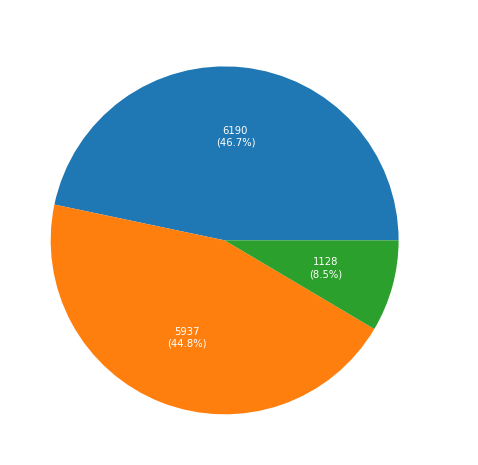

In [78]:

# Contar a quantidade de valores em cada categoria
class_counts = df_doc['CLASS'].value_counts()

# Definir a cor do texto dos labels das fatias
textprops = {'color': 'white'}

# Gerar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct=lambda pct: f'{int(pct/100*sum(class_counts))}\n({pct:.1f}%)', textprops=textprops)
plt.title('Quantidade de Valores por Classe', color='white')
plt.show()


## Quantidade de Valores por presença/ausência de valores

In [79]:
list_property = ['HAS_SCOPE_NOTE', 'HAS_DEFINITION', 'HAS_SYNONYM', 'HAS_EXAMPLE', 'HAS_ENGLISH_TRANSLATION', 'HAS_SPECIALIZATION', 'HAS_RELATED_TERM',
       'HAS_SPANISH_TRANSLATION', 'HAS_GENERALIZATION']

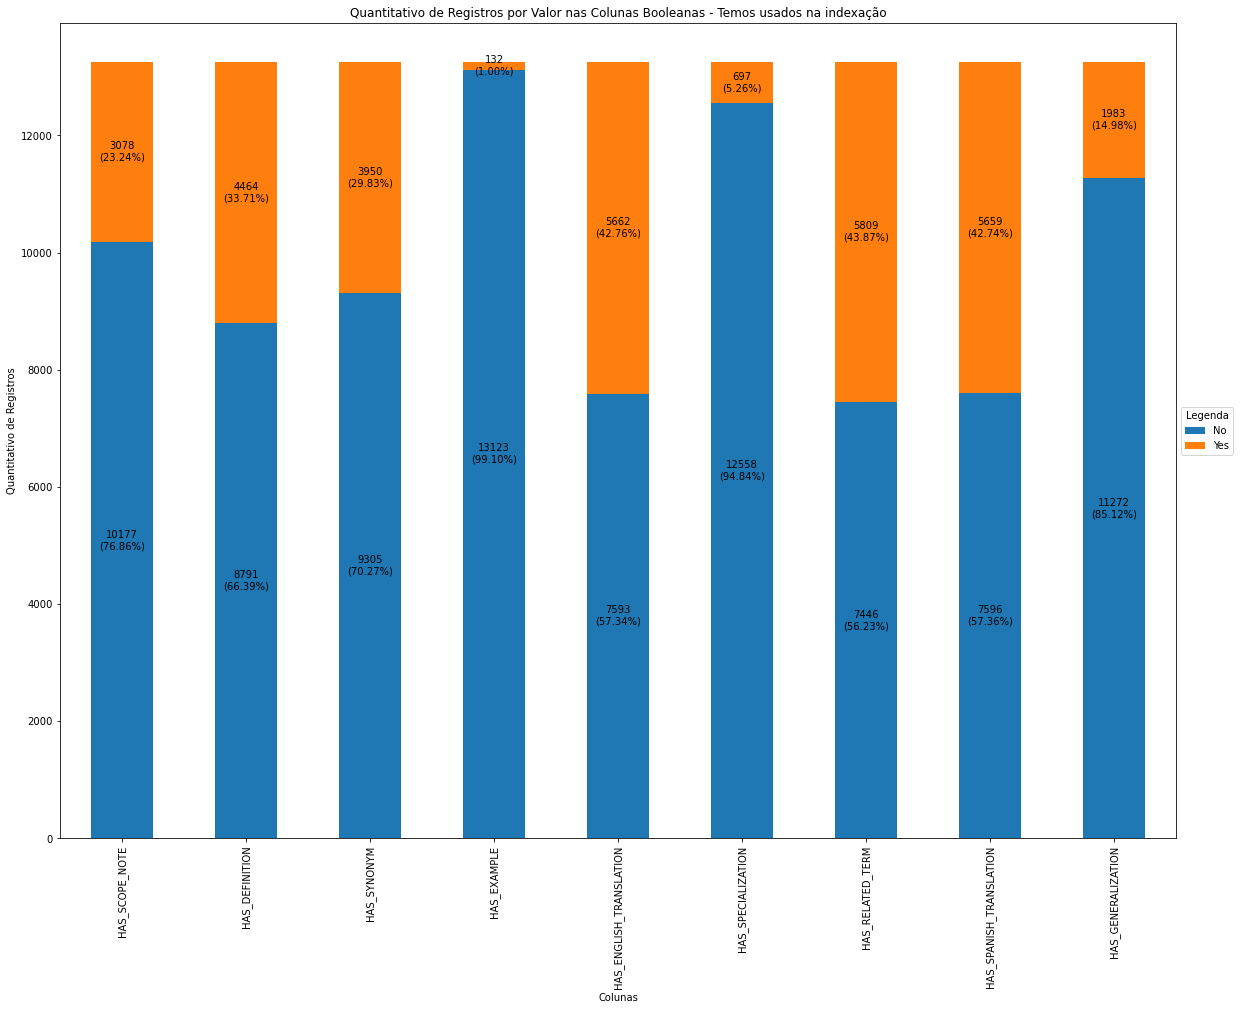

In [80]:
# Contar o número de registros para cada valor nas colunas booleanas
counts = df_doc[list_property].apply(pd.Series.value_counts)

# Gerar o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(20, 15))
counts.T.plot(kind='bar', stacked=True, ax=ax)
plt.title('Quantitativo de Registros por Valor nas Colunas Booleanas - Temos usados na indexação')
plt.xlabel('Colunas')
plt.ylabel('Quantitativo de Registros')
plt.legend(title='Valores', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)

# Calcula a soma total das alturas das barras
total = counts.sum(axis=1).sum()

# Percorre as barras e adiciona o valor absoluto e o percentual corretamente
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = height / total * 1000 * (100/111)
    ax.annotate(f'{int(height)}\n({percentage:.2f}%)', (x + width/2, y + height/2), ha='center', va='center')

# Adicionar legenda fora do gráfico
legend_labels = ['No', 'Yes']
plt.legend(legend_labels, title='Legenda', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


## Quantidade de termos usados na indexação de enunciados por presença/ausência de valores

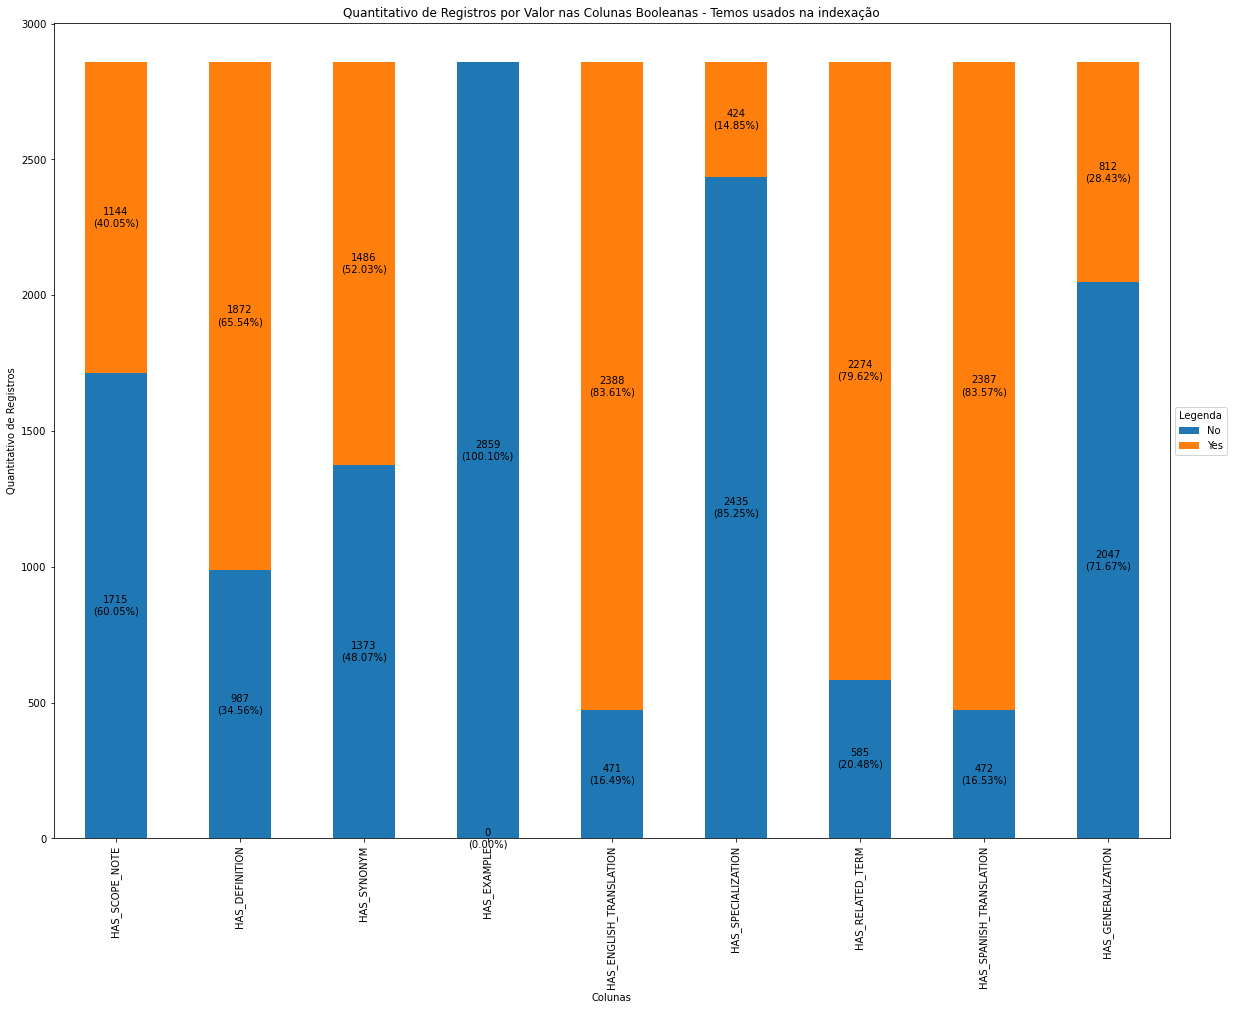

In [81]:
# Contar o número de registros para cada valor nas colunas booleanas
counts = df_doc[df_doc['COUNT_INDEX_TOTAL']>0][list_property].apply(pd.Series.value_counts)

# Gerar o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(20, 15))
counts.T.plot(kind='bar', stacked=True, ax=ax)
plt.title('Quantitativo de Registros por Valor nas Colunas Booleanas - Temos usados na indexação')
plt.xlabel('Colunas')
plt.ylabel('Quantitativo de Registros')
plt.legend(title='Valores', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)

# Calcula a soma total das alturas das barras
total = counts.sum(axis=1).sum()

# Percorre as barras e adiciona o valor absoluto e o percentual corretamente
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = height / total * 1000 * (100/111)
    ax.annotate(f'{int(height)}\n({percentage:.2f}%)', (x + width/2, y + height/2), ha='center', va='center')

# Adicionar legenda fora do gráfico
legend_labels = ['No', 'Yes']
plt.legend(legend_labels, title='Legenda', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


## Comparativo entre o total e os usados na indexação

In [82]:
# Criar uma cópia do DataFrame original para adicionar as novas colunas
df_new = df_doc.copy()

# Iterar sobre as colunas em list_property
for col in list_property:
    # Criar uma nova coluna com o nome "property_count" correspondente a cada coluna em list_property
    df_new[col + "_INDEXED"] = np.where(df_doc['COUNT_INDEX_TOTAL'] > 0, df_doc[col], np.nan)



In [83]:
list_property += ['HAS_SCOPE_NOTE_INDEXED', 'HAS_DEFINITION_INDEXED', 'HAS_SYNONYM_INDEXED', 'HAS_EXAMPLE_INDEXED', 'HAS_ENGLISH_TRANSLATION_INDEXED', 'HAS_SPECIALIZATION_INDEXED', 'HAS_RELATED_TERM_INDEXED',
       'HAS_SPANISH_TRANSLATION_INDEXED', 'HAS_GENERALIZATION_INDEXED']

In [84]:
list_property.sort()

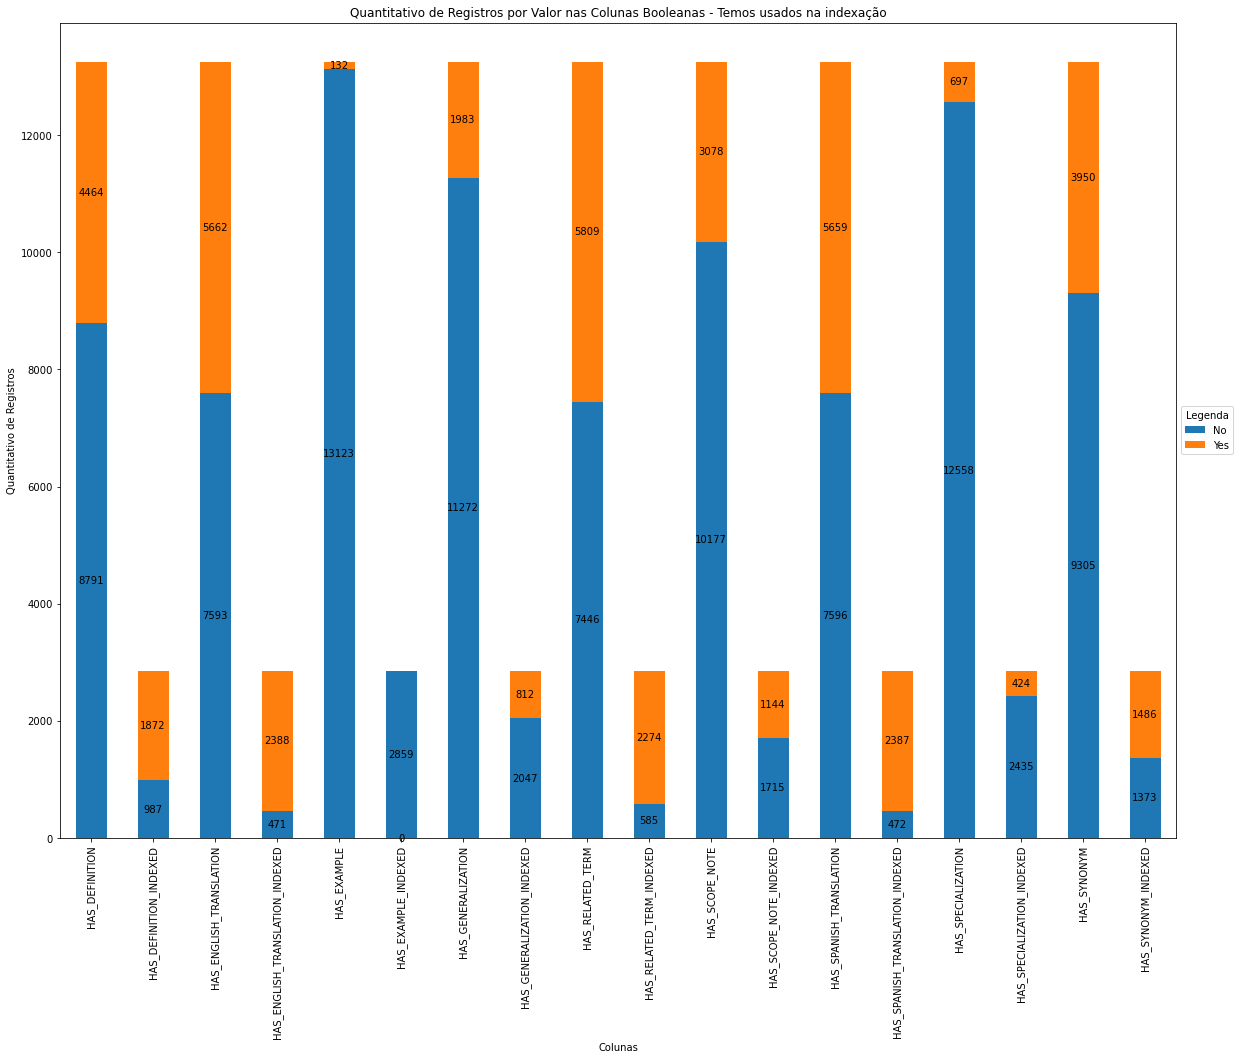

In [88]:
# Contar o número de registros para cada valor nas colunas booleanas
counts = df_new[list_property].apply(pd.Series.value_counts)
# Ordenar as colunas pelo nome em list_property
counts_sorted = counts.T.reindex(list_property)

# Gerar o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(20, 15))
counts_sorted.plot(kind='bar', stacked=True, ax=ax)
plt.title('Quantitativo de Registros por Valor nas Colunas Booleanas - Temos usados na indexação')
plt.xlabel('Colunas')
plt.ylabel('Quantitativo de Registros')
plt.legend(title='Valores', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)

# Adicionar legenda fora do gráfico
legend_labels = ['No', 'Yes']
plt.legend(legend_labels, title='Legenda', loc='center left', bbox_to_anchor=(1, 0.5))

# Adicionar o quantitativo em cada barra
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

## Tamanho dos textos (palavras, caracteres e tokens)

### Cálculo dos quantitativos

In [89]:
df_doc['LEN_TEXT_CHAR'] = df_doc['TEXT'].apply(len)
df_doc['LEN_TEXT_CHAR_LOG'] = round(np.log(df_doc['TEXT'].apply(len))).astype(int)
df_doc['NUM_WORD'] = df_doc['TEXT'].apply(lambda x: len(x.split()))
df_doc['NUM_TOKENS_MONOT5_3B'] = df_doc['TEXT'].apply(retorna_num_tokens, parm_tokenizador=tokenizador_pt_monot5_3b)
df_doc['NUM_TOKENS_MINILM'] = df_doc['TEXT'].apply(retorna_num_tokens, parm_tokenizador=tokenizador_pt_minilm)

In [90]:
df_doc[list_property_len].describe().round()

,NUM_WORD,LEN_TEXT_CHAR,LEN_TEXT_CHAR_LOG,NUM_TOKENS_MONOT5_3B,NUM_TOKENS_MINILM
count,13255.0,13255.0,13255.0,13255.0,13255.0
mean,61.0,432.0,6.0,127.0,111.0
std,50.0,361.0,1.0,104.0,90.0
min,12.0,81.0,4.0,28.0,24.0
25%,20.0,133.0,5.0,42.0,36.0
50%,45.0,322.0,6.0,92.0,85.0
75%,89.0,645.0,6.0,185.0,162.0
max,566.0,3739.0,8.0,1114.0,1046.0


### Gráficos

In [91]:
list_property_len = ['NUM_WORD', 'LEN_TEXT_CHAR', 'LEN_TEXT_CHAR_LOG', 'NUM_TOKENS_MONOT5_3B', 'NUM_TOKENS_MINILM']


#### Histogramas

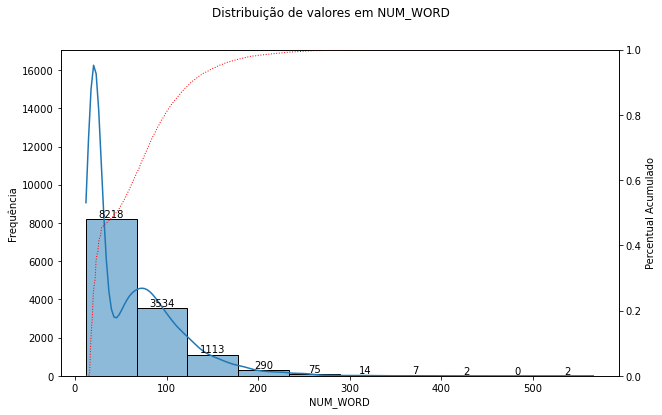

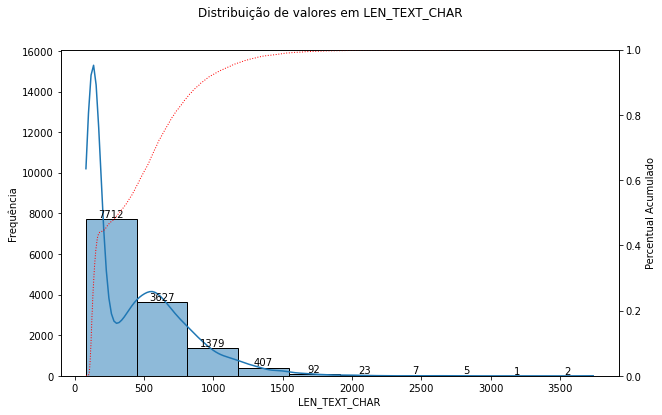

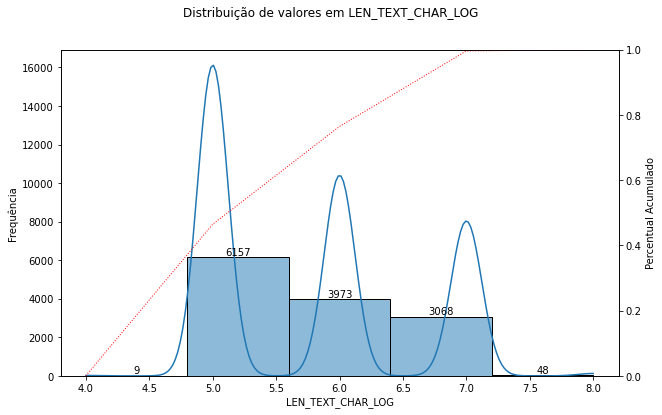

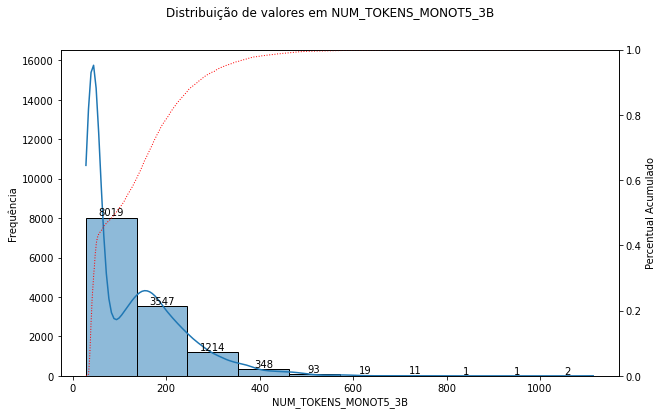

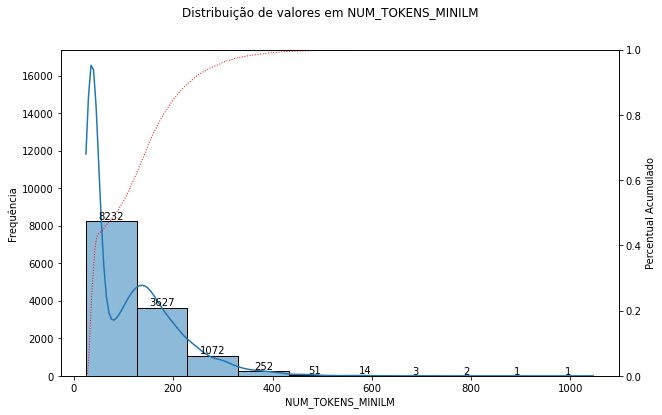

In [92]:
for property in list_property_len:
    if property == 'LEN_TEXT_CHAR_LOG':
        num_bins = 5
    else:
        num_bins = 10   
    f, ax = plt.subplots(1, 1, figsize=(10,6))
    f.suptitle(f'Distribuição de valores em {property}')    
    # Plot o histograma normalizado com KDE
    sns.histplot(data=df_doc[property], kde=True, ax=ax, linewidth=1, bins=num_bins)

    # Calcula o percentual acumulado
    cumulative = df_doc[property].value_counts(normalize=True).sort_index().cumsum()

    # Cria um novo eixo y com o percentual acumulado
    ax2 = ax.twinx()
    ax2.plot(cumulative.index, cumulative.values, linestyle='dotted', marker='', color='red', linewidth=1)
    ax2.set_ylim([0, 1])
    ax2.set_ylabel('Percentual Acumulado')

    # Adicionar valores nas barras
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

    ax.set_xlabel(property)
    ax.set_ylabel('Frequência')
plt.show()


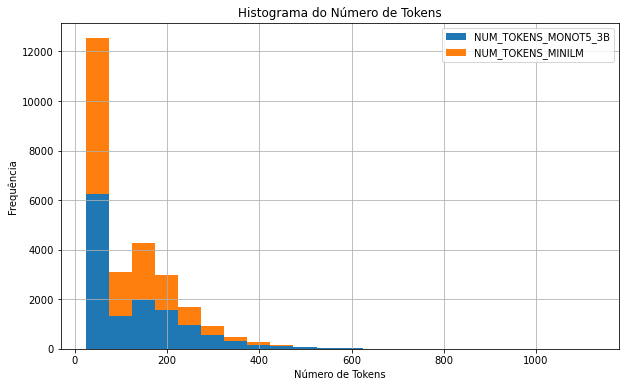

In [93]:
# Definir os limites dos intervalos
bin_width = 50
min_value = min(df_doc['NUM_TOKENS_MONOT5_3B'].min(), df_doc['NUM_TOKENS_MINILM'].min())
max_value = max(df_doc['NUM_TOKENS_MONOT5_3B'].max(), df_doc['NUM_TOKENS_MINILM'].max())
bins = np.arange(min_value, max_value + bin_width, bin_width)

# Plotar o histograma empilhado
plt.figure(figsize=(10, 6))
plt.hist([df_doc['NUM_TOKENS_MONOT5_3B'], df_doc['NUM_TOKENS_MINILM']], bins=bins, histtype='barstacked',
         label=['NUM_TOKENS_MONOT5_3B', 'NUM_TOKENS_MINILM'])
plt.title('Histograma do Número de Tokens')
plt.xlabel('Número de Tokens')
plt.ylabel('Frequência')
plt.grid(True)
plt.legend()

plt.show()

#### Limit analysis 

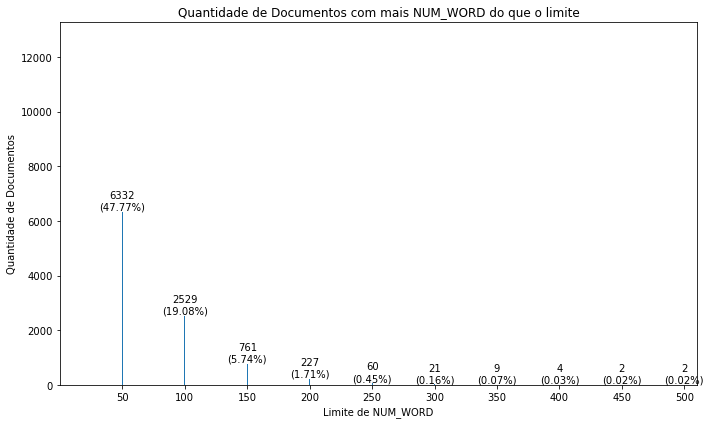

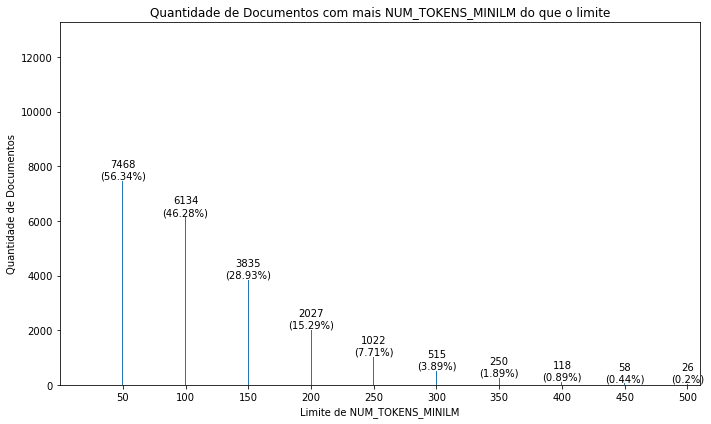

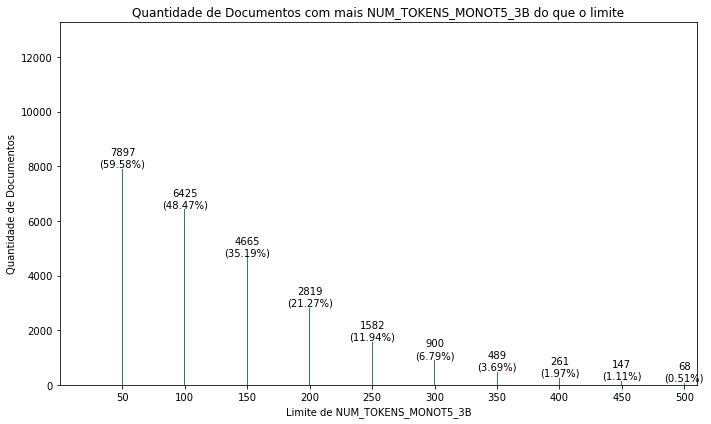

In [94]:
# Definir os limites mínimo e máximo para o eixo x
x_min = 50
x_max = 500

total = df_doc.shape[0]
# Definir o intervalo entre os valores do eixo x
x_interval = 50

# Calcular a quantidade de enunciados com mais registros do que cada valor em x
x_values = range(x_min, x_max+1 , x_interval)

for column in ['NUM_WORD', 'NUM_TOKENS_MINILM', 'NUM_TOKENS_MONOT5_3B']:
    y_values = [df_doc[df_doc[column] > x].shape[0] for x in x_values]

    # Criar o gráfico de barras
    plt.figure(figsize=(10, 6))
    bars = plt.bar(x_values, y_values)

    # Adicionar os valores nas barras
    for bar in bars:
        height = bar.get_height()
        percentage = round(100 * height / total, 2)
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height}\n({percentage}%)", ha='center', va='bottom')

    # Configurar o título e rótulos dos eixos
    plt.title(f'Quantidade de Documentos com mais {column} do que o limite')
    plt.xlabel(f'Limite de {column}')
    plt.ylabel('Quantidade de Documentos')

    # Configurar os ticks e rótulos do eixo x
    plt.xticks(x_values)
    plt.xlim(0, x_max + 10)
    plt.ylim(0, total + 10)

    # Exibir o gráfico
    plt.tight_layout()
plt.show()
